# MSc Data Science
# DSM140 Natural Language Processing Coureswork
# Sentiment Analysis on Amazon Product Review

> # Section One: Introduction

# 1. Introduction to the Domain-specific Area

The rapid growth of the internet helped spread electronic commerce, resulting in a shift from the traditional Brick and Mortar business model to purchasing directly through the internet. Moreover recently, there has been even more demand for online shopping due to the spread of covid-19, all the restrictions imposed on people movement and limitations on markets footfall.
Over time, online shopping has evolved and is available now in many types such as online marketplaces like Amazon and social media. This flexibility allowed consumers to be aware of the product characteristics and quality before purchasing. In addition, product reviews written by the consumers play a significant role in the decision making, buying experience and shopping satisfaction since reviews are available for most kinds of products, even those unique ones. Hence, consumers tend to make buying decisions mainly based on other consumers' reviews and are influenced a lot by the reviews and those who wrote these reviews since they represent an actual experience. For that reason, E-commerce retailers have acknowledged how critical product reviews are since they can help to boost sales and enhance the product by extracting insights about customers' needs and concerns <cite id="pacst"><a href="#zotero|11835528/9KPR9SYK">(AlZu’bi et al. 2019)</a></cite>.

On the other hand, product reviews became a vital part of the online store's business model beyond branding and marketing since they can provide insights on the performance of other areas of the company from the customer's point of view. Accordingly, many ideas were introduced to ensure consumers are exposed to the most valuable reviews, either by allowing users to vote for any given review as helpful or unhelpful or by using a rating system on reviews. Natural Language Processing (NLP) has been an academic discipline for many decades and made its way in the last 5-10 years to adoption beyond academia in different industries and various applications or use cases such as sentiment analysis that helps convert unstructured text data (i.e. customer interactions, social media comments or reviews) into meaningful insights <cite id="kiepi"><a href="#zotero|11835528/W8I2WS5S">(Jurafsky &#38; Martin 2014)</a></cite>.

Sentiment analysis is one of the most common types of text classification that automatically indicates people's emotions towards something, whether it is positive, negative or neutral. In this coursework the focus was on predicting the sentiment for Amazon product reviews using supervised learning techniques. Many researchers covered the area of sentiment analysis on amazon reviews. The focus was on what role do online reviews play in the buying journey and decision making towards a certain product or service. The paper concluded also that models developed using Support Vector Machine (SVM) provided more accuracy compared to Naïve bayes and maximum entropy methods. The paper also sheds the light on the issue of fake reviews and the importance of detection of the fake review potentially use deep mining techniques <cite id="avqo8"><a href="#zotero|11835528/KAUQGKTZ">(Shivaprasad &#38; Shetty 2017)</a></cite>.

Another paper titled "Sentiment analysis using product review data" looked at the one main challenges in sentiment analysis: sentiment polarity categorisation, whether at sentence or review-level. The study produced promising results using scikit-learn package on models such as Naïve Bayes, Random Forest, and SVM <cite id="3rkxu"><a href="#zotero|11835528/PA9H2U58">(Fang &#38; Zhan 2015)</a></cite>.

# 2. Objectives

This coursework aims to achieve below objectives

* Evaluate various machine learning algorithms for text classification such as (Multinomial Naive Bayes, Random Forest, Decision Tree, Logistic Regression, K-Neighbor, Bernoulli Naive Bayes) and select the most appropriate model in terms of model validation metrics on the new/unseen reviews
* Validate the produced models using confusion matrix metrics such as accuracy (ratio of correct predictions to total predictions), recall, F1-score and precision
* Understand the impact of the various text pre-processing and normalisation techniques (i.e. tokenisation, lemmatisation, spelling auto-correct, stop words removal) on small piece of text by evaluating in isolation the text before and after using the techniques
* Build various classifiers based on supervised learning that automatically categorise, predict and extract sentiment for new product reviews
* The model will also help to understand the consumer opinions and feelings toward the reviewed products
* The model will easily explain which product categories show the highest level of positive sentiment and hence can be potential to generate more sales, while for the products in which negative sentiment is observed, corrective actions can be implemented. The actions recommendation's part is out of the scope here
* The model will allow us to understand the sentiment movement, which is a change in consumer sentiment towards a particular product category based on the reviewer ID and its serial number by using last two reviews
* By analysing consumer sentiment, the model will help in identifying the most reviewed product categories and provide insights on the consumer's view about those products
* Provide the most used words in the reviews for each product category and sentiment in the form of word cloud


# 3. Dataset: Description of the Selected Dataset 

After careful research and based on relevancy to the topic of NLP, the "The Multilingual Amazon Reviews Corpus" was identified and acquired. The dataset is available from AWS (Amazon website) as open-source data on the following link (<a href=" https://registry.opendata.aws/amazon-reviews-ml/">here</a>). To examine the license and availability to use, from the following link (<a href=" https://docs.opendata.aws/amazon-reviews-ml/readme.html#license">here</a>). 

It is a consumer-facing dataset capturing a consumer opinion or attitude towards products sold in Amazon, and the dataset is part of "Multilingual Amazon Reviews Corpus" (MARC), a collection of Amazon reviews covering various languages such as Japanese, Spanish, Chinese, English and French.
In the dataset each language is represented with 3 different json files, train, test and development. The focus of this coursework is to analyse the **English language corpus** since the understanding of the language would make it more efficient to pre-process, normalise and model. However, it is expected that the model can be applied in the same way to other languages.
These reviews were collected in the period from 2015 to 2019, and the dataset consists of 200,000 records for the train category set and  5,000 records equally for both development and test datasets. They are merged together in a one dataframe for two reseaons, first, to apply the pre-processing in all the dataset. Second, to utilise the train_test_split function in sklearn and split the data into 80/20, as the default dataset split is 2.5% for each test and development from the total dataset which seems quite small to test on that size <cite id="5u2m5"><a href="#zotero|11835528/XUD9P6U5">(Keung et al. 2020)</a></cite>.

The acquired data covers 31 different product categories such as apparel, automotive, beauty, book, camera and many more. Each record contains all the required information such as the review text, the review title, the star rating, an anonymised reviewer ID. In total, a record will have eight attributes in the columns (review id, product id, reviewer id, stars, review body, review title, language, product category) with string data types for all of them except the rating variable is an integer. The product id and language were dropped as it is just redundant. Moreover, review body and review title were merged together since the title has some insights which can lead to the sentiment of the review body.

There is a number of reasons that made this dataset well-suited for sentiment analysis use case. Below are some of the reasons:
- The dataset has a high level of reliability and quality given that it is produced by Amazon rather than being collected by another party
- Data is made more reliable since, in Amazon, any product review is tagged with a rating on it in the range from 1 to 5. The rating is based on a star-scaled system.
- The dataset is fairly balanced in terms of review rating while each rating consist of 20% of the reviews in the datasets 
- Moreover, the chosen English corpus vocabulary are not too scientific or technical and suitable for text normalisation as it does not require domain-specific expertise to be understood and examined when applying stop words and lemmatisation


# 4. Evaluation Methodology

In this coursework, the model would classify each review into one of three possible categories: positive, negative, or neutral sentiment. However, given the subjectivity of people's opinion, the focus was to have a model with high accuracy and can be generalised on unseen data.

It is a best practice to determine, in advance, how the model will be evaluated and to identify the evaluation metrics and how they will be applied once the supervised model is developed. Therefore, to evaluate the performance of the output model, "confusion matrix" is chosen as the primary tool since it simplifies the evaluation based on comparing predicted sentiment versus the actual sentiment (the true labels of each paragraph) for example, positive reviews as tagged by the consumer
The various evaluation metrics to display the classifier that performs well relative to the test dataset include precision, F-measure, recall, and accuracy.

The focus will be on comparing the models based on accuracy since the dataset contains relatively balanced classes. Therefore, the higher the accuracy, the better the model is assumed. In this regard, the baseline model will be set as a benchmark compared with other classifiers such as Multinomial Naive Bayes, Random Forest, Decision Tree, Logistic Regression, K-Neighbor, Bernoulli Naive Bayes. Those models should beat the baseline accuracy score. At a high level, there is a comparison between models with features extracted using count vectoriser compared to TFIDF. For each confusion matrix and classification report that contained an F1 score, precision, recall and accuracy were generated, and the best model was identified. Following that, the best model was analysed in detail by fine-tuning the hyperparameters and best parameters used again to retrain the model.

> # Section Two: Implementation

In [6]:
# # install packages
%pip uninstall nltk
%pip install emot
%pip install autocorrect
%pip install -U nltk
%pip install emoji
%pip install emoji --upgrade
%pip install wordcloud
%pip install contractions==0.0.18
%pip install plotly
%pip install jupyterlab-citation-manager
# pip freeze > requirements.txt

^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\maiad\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\maiad\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: regex>=2021.8.3 in c:\users\maiad\anaconda3\lib\site-packages (from nltk) (2021.8.3)



You should consider upgrading via the 'C:\Users\maiad\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\maiad\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\maiad\anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\maiad\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\maiad\\AppData\\Local\\Temp\\pip-install-1ylbtk4g\\wordcloud_551757e7f9a04cd5ab46b5c8f8eb1f55\\setup.py'"'"'; __file__='"'"'C:\\Users\\maiad\\AppData\\Local\\Temp\\pip-install-1ylbtk4g\\wordcloud_551757e7f9a04cd5ab46b5c8f8eb1f55\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\maiad\AppData\Local\Temp\pip-wheel-youf6np7'
       cwd: C:\Users\maiad\AppData\Local\Temp\pip-install-1ylbtk4g\wordcloud_551757e7f9a04cd5ab46b5c8f8eb1f55\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\maiad\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\maiad\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nbformat in c:\users\maiad\anaconda3\lib\site-packages (from jupyter-server<2,>=1.6->jupyterlab-citation-manager) (5.1.3)



You should consider upgrading via the 'C:\Users\maiad\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
# C:\Users\maiad\anaconda3\python.exe -m pip install --upgrade pip

In [6]:
%matplotlib inline

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # nltk has built-in stop word lists
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.probability import FreqDist
from nltk.collocations import *
from nltk.collocations import BigramAssocMeasures

import emoji
from emoji.unicode_codes import UNICODE_EMOJI

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

import contractions
from wordcloud import WordCloud
from autocorrect import Speller

import plotly.graph_objects as go
import plotly.express as pex

In [8]:
nltk.download('stopwords') 
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maiad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maiad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# random value generator to have a reproducible results
seed = 50
np.random.seed(seed)

# 1. Read in Data

> Dataset has been downloaded as three JSON files (train, test and development), and the files have been loaded as different dataframes and then combined as a one dataframe.

In [10]:
# read the file from a local system directory
df_train = pd.read_json("dataset_en_train.json", lines=True)
df_test = pd.read_json("dataset_en_test.json", lines=True)
df_dev = pd.read_json("dataset_en_dev.json", lines=True)

In [11]:
# concatenate all the data frames to do the pre-processing for all of them once
# ignore the previous index and set a unique id from 0 to 209999
df = pd.concat([df_train, df_test, df_dev], ignore_index=True)
df.index.names = ['id']

df.head().append(df.tail())

review_id          product_id          reviewer_id  stars  \
id                                                                   
0       en_0964290  product_en_0740675  reviewer_en_0342986      1   
1       en_0690095  product_en_0440378  reviewer_en_0133349      1   
2       en_0311558  product_en_0399702  reviewer_en_0152034      1   
3       en_0044972  product_en_0444063  reviewer_en_0656967      1   
4       en_0784379  product_en_0139353  reviewer_en_0757638      1   
209995  en_0447642  product_en_0068982  reviewer_en_0061521      5   
209996  en_0950370  product_en_0563046  reviewer_en_0871798      5   
209997  en_0203466  product_en_0848682  reviewer_en_0474236      5   
209998  en_0010627  product_en_0536493  reviewer_en_0546192      5   
209999  en_0290511  product_en_0964853  reviewer_en_0850986      5   

                                              review_body  \
id                                                          
0       Arrived broken. Manufacturer defect. Two of th...   
1       the cabinet dot were all detached from backing...   
2       I received my first order of this product and ...   
3       This product is a piece of shit. Do not buy. D...   
4       went through 3 in one day doesn't fit correct ...   
209995  This ribbon is so adorable! Goes perfect with ...   
209996                     I am in love with this kettle.   
209997  My Doberman Loves Having His Nails Trimmed and...   
209998  I love my Fire.. I do everything on it, read, ...   
209999  A wish I would've ordered one size smaller (I ...   

                                             review_title language  \
id                                                                   
0       I'll spend twice the amount of time boxing up ...       en   
1                                            Not use able       en   
2                                    The product is junk.       en   
3                                  Fucking waste of money       en   
4                                                  bubble       en   
209995                                           So Cute!       en   
209996                                            Perfect       en   
209997                             My Doberman Loves Them       en   
209998                                         Five Stars       en   
209999                                        SUPER CUTE!       en   

        product_category  
id                        
0              furniture  
1       home_improvement  
2                   home  
3               wireless  
4                     pc  
209995              home  
209996           kitchen  
209997      pet_products  
209998             other  
209999           apparel

In [12]:
# inspect the size of data frame after dropping some columns
df.shape

(210000, 8)

# 2. Check Class Balance 

In [13]:
# check if the classes are balanced
pd.DataFrame(df[['stars']].value_counts(), columns = ['counts'])

counts
stars        
1       42000
2       42000
3       42000
4       42000
5       42000

> Dataset is balanced between the 1-5 stars scale, each level consists of 20% of the data points

# 3. Pre-processing

In the following step, all the punctuations from the text are removed. string library of Python contains: 
* The data types were converted to a suitable category while being careful when dealing with ordered data. 
* Merged title with review body:  new features were derived by merging review title with the review body
* Handling of Missing/duplicate Data : some duplicated data points have been removed from the dataset to ensure data quality
* Emojis: it became an integral part to how consumers express their opinions and feelings. Hence, Emojis and Emoticons are converted to textual format
* Text Cleaning
    * Noise Removal: by removing unwanted characters: such as numbers, URLs and Replacement of double spaces with single space
    * Punctuation removal : some pre-defined list of punctuations
    * Convert to lower case: It is one of the most common pre-processing steps where the text is converted into the same case preferably lower case, and especially that it does not impact the information.
    * Stop Words Removal: Stopwords are the commonly used words and are removed from the text as they carry less or no meaning. In the coursework, a customised list has been used excluding negation words since removing them will change the meaning, leading to negative reviews being positive
    * Spelling Auto-correction: Fixing misspelt words as every word is spell checked and replaced with the correct
    * Lemmatisation: using a pre-defined dictionary that contains the context of words and checks them in the dictionary while reducing

## 3.1 Binning the Target Variable (Sentiments Feature)

> A new target column named 'sentiments' has been derived based on the following, if the rating is 1 and 2, that will be considered a negative review. While, if the review is 4 and 5, the review will be set as positive review otherwise will be tagged Neutral. 

In [14]:
# derive sentiment variable that specify if the review is positive or negative based on the "stars" variable
df = df.assign(sentiment = np.where((df.stars == 1) |  (df.stars == 2), 'negative',(np.where((df.stars == 3), 'neutral', 'positive'))))

# validate the target variable
df.loc[df['stars'] == 2].head(3)

review_id          product_id          reviewer_id  stars  \
id                                                                  
40000  en_0700529  product_en_0522015  reviewer_en_0612523      2   
40001  en_0784465  product_en_0250367  reviewer_en_0423700      2   
40002  en_0786776  product_en_0732056  reviewer_en_0173428      2   

                                             review_body  \
id                                                         
40000  Didn't work. The heating element was too small...   
40001  Love how this phone case looks and feels but i...   
40002  Leaks around the lid. If you care about leaks ...   

                  review_title language product_category sentiment  
id                                                                  
40000              Ineffective       en     pet_products  negative  
40001  This material stretches       en         wireless  negative  
40002                    Leaks       en           sports  negative

In [15]:
pd.DataFrame(df[['sentiment']].value_counts(), columns = ['counts'])

counts
sentiment        
negative    84000
positive    84000
neutral     42000

## 3.2 Check Class Balance 

In [16]:
# check if the classes are balanced
pd.DataFrame(df[['stars']].value_counts(), columns = ['counts'])

counts
stars        
1       42000
2       42000
3       42000
4       42000
5       42000

> Dataset is balanced between the 1-5 stars scale, each level consists of 20% of the data points

## 3.3 Drop Irrelevant Columns 

In [17]:
# drop irrelevant columns inplace
df.drop(['product_id', 'language'], axis = 1, inplace = True)

In [18]:
# inpect the columns name after dropping
df.columns

Index(['review_id', 'reviewer_id', 'stars', 'review_body', 'review_title',
       'product_category', 'sentiment'],
      dtype='object')

## 3.4 Feature Engineering

In [19]:
# merge the review_body and review_title in one variable to add more context and hopefully improve model accuracy, we concatenate review_body, review_title
df['merged_text'] = df['review_body'] + " " + df['review_title']
df.head(3)

review_id          reviewer_id  stars  \
id                                           
0   en_0964290  reviewer_en_0342986      1   
1   en_0690095  reviewer_en_0133349      1   
2   en_0311558  reviewer_en_0152034      1   

                                          review_body  \
id                                                      
0   Arrived broken. Manufacturer defect. Two of th...   
1   the cabinet dot were all detached from backing...   
2   I received my first order of this product and ...   

                                         review_title  product_category  \
id                                                                        
0   I'll spend twice the amount of time boxing up ...         furniture   
1                                        Not use able  home_improvement   
2                                The product is junk.              home   

   sentiment                                        merged_text  
id                                                               
0   negative  Arrived broken. Manufacturer defect. Two of th...  
1   negative  the cabinet dot were all detached from backing...  
2   negative  I received my first order of this product and ...

## 3.5 Data Types and Pre-processing

In [20]:
# inspect the data types
df.dtypes

review_id           object
reviewer_id         object
stars                int64
review_body         object
review_title        object
product_category    object
sentiment           object
merged_text         object
dtype: object

### 3.5.1 Nominal and string (Non-ordered Categorical)

In [21]:
# set data types for non-ordered variables
# df.astype({'product_category': 'category', 'review_body': 'string', 'review_title': 'string'}).dtypes
df = df.astype({'review_id': 'string', 'reviewer_id': 'string', 'product_category': 'category', 'review_body': 'string', 
                'review_title': 'string', 'merged_text': 'string'})

In [22]:
# inspect product category data type
df['product_category'].dtype

CategoricalDtype(categories=['apparel', 'automotive', 'baby_product', 'beauty', 'book',
                  'camera', 'digital_ebook_purchase', 'digital_video_download',
                  'drugstore', 'electronics', 'furniture', 'grocery', 'home',
                  'home_improvement', 'industrial_supplies', 'jewelry',
                  'kitchen', 'lawn_and_garden', 'luggage',
                  'musical_instruments', 'office_product', 'other', 'pc',
                  'personal_care_appliances', 'pet_products', 'shoes',
                  'sports', 'toy', 'video_games', 'watch', 'wireless'],
, ordered=False)

### 3.5.2 Ordinal (Ordered Categorical)

In [23]:
sentiment_level = ['negative', 'neutral', 'positive']
df['sentiment'] = df['sentiment'].astype(pd.CategoricalDtype(ordered = True, categories = sentiment_level))
df['sentiment'].dtype

CategoricalDtype(categories=['negative', 'neutral', 'positive'], ordered=True)

In [24]:
# inspect the DataFrame info after converting 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   review_id         210000 non-null  string  
 1   reviewer_id       210000 non-null  string  
 2   stars             210000 non-null  int64   
 3   review_body       210000 non-null  string  
 4   review_title      210000 non-null  string  
 5   product_category  210000 non-null  category
 6   sentiment         210000 non-null  category
 7   merged_text       210000 non-null  string  
dtypes: category(2), int64(1), string(5)
memory usage: 10.0 MB


## 3.6 Handling of Missing/ Duplicate Data

### 3.6.1 Duplicate Check

In [25]:
df.duplicated().sum()

0

### 3.6.2 Missing Values Check

In [26]:
# summarize the missing values
print(df.isnull().values.any(),'\n')
df.isna().sum()

False 



review_id           0
reviewer_id         0
stars               0
review_body         0
review_title        0
product_category    0
sentiment           0
merged_text         0
dtype: int64

In [27]:
# list the unique categories 
print('Number of product category:', len(df['product_category'].unique()), '\n')
print(list(df['product_category'].unique()))

Number of product category: 31 

['furniture', 'home_improvement', 'home', 'wireless', 'pc', 'industrial_supplies', 'kitchen', 'apparel', 'automotive', 'camera', 'lawn_and_garden', 'watch', 'beauty', 'pet_products', 'drugstore', 'electronics', 'toy', 'digital_ebook_purchase', 'book', 'jewelry', 'sports', 'other', 'baby_product', 'video_games', 'office_product', 'grocery', 'digital_video_download', 'luggage', 'shoes', 'musical_instruments', 'personal_care_appliances']


# 3.7 Text Cleansing

### 3.7.1 Convert Emojis to Their Meaning

> Converting emoji instead of removing, as in sentiment analysis they could have a valuable meaning in the text, and sometimes they are used instead of writing up some words

In [28]:
# text include emoji to be checked
before_emoji = df["merged_text"][6]
before_emoji

'Ordered 2 they shipped 1 promised by certain day, then the next day, then the next day. Not reliable ☹️'

In [29]:
# extract emojis from the text
# this step is done to validate converting emoji to their meaning
def extract_emojis(string):
    """
    This function convert text that contains emojis and extract the emojis.
    """
    return ''.join(x for x in string if x in UNICODE_EMOJI['en'])

In [30]:
# check the number of emoji before converting
emoji_chk = df[df['merged_text'].apply(extract_emojis).str.len() >= 2]
print('Number of emojis after converting to text ', len(emoji_chk))

Number of emojis after converting to text  417


In [31]:
# convert merged text that contains emoji to words that describe their meaning
df['merged_text'] = df.apply(lambda x: emoji.demojize(x['merged_text']).replace(":","").replace("_"," "), axis=1)
df.head(2)

review_id          reviewer_id  stars  \
id                                           
0   en_0964290  reviewer_en_0342986      1   
1   en_0690095  reviewer_en_0133349      1   

                                          review_body  \
id                                                      
0   Arrived broken. Manufacturer defect. Two of th...   
1   the cabinet dot were all detached from backing...   

                                         review_title  product_category  \
id                                                                        
0   I'll spend twice the amount of time boxing up ...         furniture   
1                                        Not use able  home_improvement   

   sentiment                                        merged_text  
id                                                               
0   negative  Arrived broken. Manufacturer defect. Two of th...  
1   negative  the cabinet dot were all detached from backing...

In [32]:
# number of emojis after converting them to text
emoji_free_chk = df[df['merged_text'].apply(extract_emojis).str.len() >= 2]
print('Number of emojis after converting to text ', len(emoji_free_chk))

Number of emojis after converting to text  0


In [33]:
# text check
after_emoji = df["merged_text"][6]
after_emoji

'Ordered 2 they shipped 1 promised by certain day, then the next day, then the next day. Not reliable frowning face'

### 3.7.2 Contractions

> As part of the wrangling, contractions have been treated for example don’t stands for donot. This done by using contractions library.

In [34]:
# text with contractions
before_contractions = df['merged_text'][2]
before_contractions

"I received my first order of this product and it was broke so I ordered it again. The second one was broke in more places than the first. I can't blame the shipping process as it's shrink wrapped and boxed. The product is junk."

In [35]:
# expand the word using contractions fix
df['merged_text'] = df.apply(lambda x: contractions.fix(x['merged_text']), axis=1)
df.head(2)

review_id          reviewer_id  stars  \
id                                           
0   en_0964290  reviewer_en_0342986      1   
1   en_0690095  reviewer_en_0133349      1   

                                          review_body  \
id                                                      
0   Arrived broken. Manufacturer defect. Two of th...   
1   the cabinet dot were all detached from backing...   

                                         review_title  product_category  \
id                                                                        
0   I'll spend twice the amount of time boxing up ...         furniture   
1                                        Not use able  home_improvement   

   sentiment                                        merged_text  
id                                                               
0   negative  Arrived broken. Manufacturer defect. Two of th...  
1   negative  the cabinet dot were all detached from backing...

In [36]:
# validate text after using contractions
after_contractions = df['merged_text'][2]
after_contractions

'I received my first order of this product and it was broke so I ordered it again. The second one was broke in more places than the first. I cannot blame the shipping process as it is shrink wrapped and boxed. The product is junk.'

### 3.7.3 Noise Removal

> Number of text pre-processing and normalization techniques are performed on the independent varaible. Such as the lower function which makes each review in lowercase to reduce variance. Other popular techniques was utilized such as digits, punctuations and URLs removal.

In [37]:
# apply cleaning technique for unwanted characters
def clean_1(text):
    '''This finction will remove unwanted characters suchs as punctuation, lower case, URLs,..'''  
    text = str(text).lower()                                                      # lower casing
    text = ''.join(x for x in text if x not in string.punctuation)                # remove punctuation
    text = re.sub('\d+', '', text)                                                # remove digit
    text = re.sub('\[.*?\]', '', text)                                            # remove text between square brackets
    text = re.sub('((www\.[^\s]+)|(\\S*\\.com\\b)|(https?://[^\s]+))', ' ', text) # remove URLs
    text = re.sub('<.*?>+', '', text)                                             # remove text in angle bracket
    text = re.sub(r"\s+", ' ', text)                                              # replaces more than one space with a single space  
    text = re.sub('\n', '', text)                                                 # remove line breaks
    text = re.sub('\w*\d\w*', '', text)                                           # remove words containing numbers
    text = re.sub("’", '', text)                                                  # remove apostrophe, it is not on punctuation list
            
    return text

# apply the cleaning to the merged text column
df['merged_text'] = df['merged_text'].apply(lambda x:clean_1(x))
df.head()

review_id          reviewer_id  stars  \
id                                           
0   en_0964290  reviewer_en_0342986      1   
1   en_0690095  reviewer_en_0133349      1   
2   en_0311558  reviewer_en_0152034      1   
3   en_0044972  reviewer_en_0656967      1   
4   en_0784379  reviewer_en_0757638      1   

                                          review_body  \
id                                                      
0   Arrived broken. Manufacturer defect. Two of th...   
1   the cabinet dot were all detached from backing...   
2   I received my first order of this product and ...   
3   This product is a piece of shit. Do not buy. D...   
4   went through 3 in one day doesn't fit correct ...   

                                         review_title  product_category  \
id                                                                        
0   I'll spend twice the amount of time boxing up ...         furniture   
1                                        Not use able  home_improvement   
2                                The product is junk.              home   
3                              Fucking waste of money          wireless   
4                                              bubble                pc   

   sentiment                                        merged_text  
id                                                               
0   negative  arrived broken manufacturer defect two of the ...  
1   negative  the cabinet dot were all detached from backing...  
2   negative  i received my first order of this product and ...  
3   negative  this product is a piece of shit do not buy doe...  
4   negative  went through in one day does not fit correct a...

In [38]:
' '.join(df["merged_text"][:5])

'arrived broken manufacturer defect two of the legs of the base were not completely formed so there was no way to insert the casters i unpackaged the entire chair and hardware before noticing this so i will spend twice the amount of time boxing up the whole useless thing and send it back with a star review of part of a chair i never got to sit in i will go so far as to include a picture of what their injection molding and quality assurance process missed though i will be hesitant to buy again it makes me wonder if there are not missing structures and supports that do not impede the assembly process i will spend twice the amount of time boxing up the whole useless thing and send it back with a star review  the cabinet dot were all detached from backing got me not use able i received my first order of this product and it was broke so i ordered it again the second one was broke in more places than the first i cannot blame the shipping process as it is shrink wrapped and boxed the product 

### 3.7.4 Stop Words Removal

> Stopwords will be removed as they don't provide any insight and have a high frequency which affects the analysis. NLTK's stopwords database was used, then some words have been added after analysing n-gram in the next section, so those frequent words were added after showing in reviews for all sentiment.

> Moreover, negation words were removed from the stopwords list like not, wouldn't, ... etc. as they have a big impact on the text when using sentiment analysis, for example, "the watch was not working" if not is removed the sentiment will be converted from negative to positive sentiment.

In [39]:
# inspect the merged text prior applying stop words
before_stopWords = df['merged_text'][2]
before_stopWords

'i received my first order of this product and it was broke so i ordered it again the second one was broke in more places than the first i cannot blame the shipping process as it is shrink wrapped and boxed the product is junk'

In [40]:
# initiate a stop variable using nltk stop words
print(len(stopwords.words('english')))
stop_words = set(stopwords.words('english'))

stop = set(stopwords.words('english'))
print(stop)

179
{'where', 'being', 'during', 'other', 'should', 'did', 'both', 'once', 'you', 'hers', 'shouldn', 'nor', 'doesn', 'over', "mustn't", 'ain', 'that', 'am', 'but', 'so', 'out', 'and', 'ours', "you'll", "haven't", 'before', 'about', 'he', 'they', 'll', 'there', "don't", "doesn't", 'him', 'more', 'yours', 'such', 'not', "didn't", 'weren', 're', "wasn't", 'wasn', 'own', 'down', 'does', 'are', 'same', 'which', 'be', 'doing', 'between', 'with', 'again', 'm', "you've", 'them', 'above', 'off', 'an', "couldn't", 'needn', 'on', 'no', 'we', 'mightn', 'mustn', 'the', 'wouldn', 'at', 'from', 'my', 'she', 'a', 'for', 'now', 'hasn', 'than', 'by', 'me', 'or', 'as', "that'll", 'after', 'o', 'until', "it's", "aren't", 'here', 'won', 'few', 'of', 'against', 'haven', "isn't", 'hadn', 'just', 'into', 'can', 'herself', "she's", "should've", 'any', 'some', 'been', 'theirs', 'shan', 'most', 'myself', 'himself', 'themselves', 'your', 'under', "shan't", 'it', 'yourselves', 'is', 'if', 'their', "needn't", 'then

In [41]:
# customize the stop words by removing negation as the project rely on it
# without removing the meaning will be totally changed, thus negative reviews could end up positive
remove = ["ll", "didn't", "don't", "needn't", "no", "not", "hadn't", "mustn't", "haven't", "nor", "doesn't", "weren", "will", "mightn", "mightn't", "mustn", "aren", "ma", "don", "hasn't", "couldn", "won't", "couldn't", "t", "aren't", "shan", "wasn't", "doesn", "m", "if", "o", "wouldn", "wasn", "needn", "shouldn", "hasn", "shouldn't", "haven", "ain", "s", "won", "hadn", "but", "wouldn't", "didn", "weren't", "off", "down", "shan't", "isn't"]
len(remove)

# those words added after applying the unigram in the next section 
# they where the most common words accros all the reviews and accros all the sentiment which means they add nothing
# those were added after applying n-gram in the next section
add = ['but', 'like', 'get', 'would', 'will', 'look', 'make', 'if', 'could', 'still', 'think', 'use']

In [42]:
# set a new stop words variable to be the new list after removing negation words

new_stop_words = set(stop) - set(remove)
new_stop_words.update(add)

print('New stop words length:', len(new_stop_words), '\n')
print(new_stop_words)

New stop words length: 141 

{'where', 'during', 'being', 'other', 'should', 'did', 'both', 'once', 'you', 'hers', 'over', 'that', 'am', 'but', 'so', 'out', 'and', 'ours', "you'll", 'think', 'before', 'about', 'he', 'they', 'there', 'him', 'more', 'yours', 'such', 're', 'own', 'are', 'does', 'same', 'which', 'be', 'doing', 'between', 'with', 'again', "you've", 'make', 'them', 'above', 'an', 'on', 'we', 'the', 'at', 'from', 'my', 'she', 'a', 'for', 'now', 'than', 'by', 'me', 'or', 'as', "that'll", 'after', 'until', "it's", 'here', 'few', 'of', 'against', 'just', 'into', 'can', 'herself', "she's", "should've", 'any', 'some', 'been', 'theirs', 'most', 'myself', 'himself', 'themselves', 'your', 'under', 'it', 'look', 'get', 'yourselves', 'is', 'would', 'their', 'if', 'then', 'do', 'use', 'through', 'each', 'itself', 'what', 'his', 'because', 've', 'when', 'our', 'yourself', 'its', 'further', 'all', 'will', 'could', 'whom', 'i', 'very', 'too', 'to', 'how', 'was', 'like', 'have', 'who', 'why

In [43]:
# apply the stop words to merged text variable
df['merged_text'] = df['merged_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (new_stop_words)]))
df['merged_text'][2]

'received first order product broke ordered second one broke places first cannot blame shipping process shrink wrapped boxed product junk'

In [44]:
# inspect the merged text after applying stop words
after_stopWords = df['merged_text'][2]
print(before_stopWords)
after_stopWords

i received my first order of this product and it was broke so i ordered it again the second one was broke in more places than the first i cannot blame the shipping process as it is shrink wrapped and boxed the product is junk


'received first order product broke ordered second one broke places first cannot blame shipping process shrink wrapped boxed product junk'

### 3.7.5 Spelling Auto-correction

> The below code will correct misspelled words in the text

In [45]:
before_correct = df["merged_text"]

In [46]:
before_correct_1 = ' '.join(df["merged_text"][:5])
before_correct_1

'arrived broken manufacturer defect two legs base not completely formed no way insert casters unpackaged entire chair hardware noticing spend twice amount time boxing whole useless thing send back star review part chair never got sit go far include picture injection molding quality assurance process missed though hesitant buy makes wonder not missing structures supports not impede assembly process spend twice amount time boxing whole useless thing send back star review cabinet dot detached backing got not able received first order product broke ordered second one broke places first cannot blame shipping process shrink wrapped boxed product junk product piece shit not buy not work try call customer support not take number fucking rip off fucking waste money went one day not fit correct not bubbles better without bubble'

In [47]:
checker = Speller(lang="en", fast=True)

def correct(text):
    '''This function takes a text as an input then tokenized it into words, spell check the words 
    then return the corrected words, then join them and returns the corrected sentences'''
    token_words = word_tokenize(text)
    correct_sentence = []
    for word in token_words:
        correct_sentence.append(checker(word))
        correct_sentence.append(" ")
    return "".join(correct_sentence)

df['merged_text'] = df["merged_text"].apply(lambda x:correct(x))
df.head(3)

review_id          reviewer_id  stars  \
id                                           
0   en_0964290  reviewer_en_0342986      1   
1   en_0690095  reviewer_en_0133349      1   
2   en_0311558  reviewer_en_0152034      1   

                                          review_body  \
id                                                      
0   Arrived broken. Manufacturer defect. Two of th...   
1   the cabinet dot were all detached from backing...   
2   I received my first order of this product and ...   

                                         review_title  product_category  \
id                                                                        
0   I'll spend twice the amount of time boxing up ...         furniture   
1                                        Not use able  home_improvement   
2                                The product is junk.              home   

   sentiment                                        merged_text  
id                                                               
0   negative  arrived broken manufacturer defect two legs ba...  
1   negative         cabinet dot detached backing got not able   
2   negative  received first order product broke ordered sec...

In [48]:
after_correct_1 = ' '.join(df["merged_text"][:5])
after_correct_1

'arrived broken manufacturer defect two legs base not completely formed no way insert masters unpackaged entire chair hardware noticing spend twice amount time boxing whole useless thing send back star review part chair never got sit go far include picture injection molding quality assurance process missed though hesitant buy makes wonder not missing structures supports not impede assembly process spend twice amount time boxing whole useless thing send back star review  cabinet dot detached backing got not able  received first order product broke ordered second one broke places first can not blame shipping process shrink wrapped boxed product junk  product piece shit not buy not work try call customer support not take number fucking rip off fucking waste money  went one day not fit correct not bubbles better without bubble '

### 3.7.6 Lemmatization

> Lemmatization method was used to get words to their base root, which helps in grouping similar words together, the code was inspired from <cite id="2ygtb"><a href="#zotero|11835528/CYDVBSNG">(2018)</a></cite>

In [49]:
# inspect the merged text prior applying lemmatization
before_lemma = df['merged_text'][0]
before_lemma

'arrived broken manufacturer defect two legs base not completely formed no way insert masters unpackaged entire chair hardware noticing spend twice amount time boxing whole useless thing send back star review part chair never got sit go far include picture injection molding quality assurance process missed though hesitant buy makes wonder not missing structures supports not impede assembly process spend twice amount time boxing whole useless thing send back star review '

In [50]:
lemmatization = WordNetLemmatizer()

def lemma(text):
    '''This function takes a text as an input, then tokenized it into words to be able to lemmatize it, 
    join them and returns the lemmatized sentence'''
    token_words = word_tokenize(text)
    lemma_sentence = []
    for word in token_words:
        lemma_sentence.append(lemmatization.lemmatize(word, pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

df['merged_text'] = df["merged_text"].apply(lambda x:lemma(x))
df.head(3)

review_id          reviewer_id  stars  \
id                                           
0   en_0964290  reviewer_en_0342986      1   
1   en_0690095  reviewer_en_0133349      1   
2   en_0311558  reviewer_en_0152034      1   

                                          review_body  \
id                                                      
0   Arrived broken. Manufacturer defect. Two of th...   
1   the cabinet dot were all detached from backing...   
2   I received my first order of this product and ...   

                                         review_title  product_category  \
id                                                                        
0   I'll spend twice the amount of time boxing up ...         furniture   
1                                        Not use able  home_improvement   
2                                The product is junk.              home   

   sentiment                                        merged_text  
id                                                               
0   negative  arrive break manufacturer defect two legs base...  
1   negative              cabinet dot detach back get not able   
2   negative  receive first order product break order second...

In [51]:
# inspect the merged text after applying lemmatization
after_lemma = df['merged_text'][0]
print(before_lemma)
after_lemma

arrived broken manufacturer defect two legs base not completely formed no way insert masters unpackaged entire chair hardware noticing spend twice amount time boxing whole useless thing send back star review part chair never got sit go far include picture injection molding quality assurance process missed though hesitant buy makes wonder not missing structures supports not impede assembly process spend twice amount time boxing whole useless thing send back star review 


'arrive break manufacturer defect two legs base not completely form no way insert master unpackaged entire chair hardware notice spend twice amount time box whole useless thing send back star review part chair never get sit go far include picture injection mold quality assurance process miss though hesitant buy make wonder not miss structure support not impede assembly process spend twice amount time box whole useless thing send back star review '

### 3.7.7 Inspect cleaning

> Check the merged text variable before and after applying the cleaning techniques

In [52]:
# before cleaning
old_text = ' '.join(df['review_body'] + df['review_title'])

# after cleaning
new_text = ' '.join(df['merged_text'])

print("old length before pre-processing:", len(old_text))
print("new length after processing:", len(new_text))

old length before pre-processing: 42855353
new length after processing: 25441490


# 4. Exploratory Data Analysis (EDA)

## 4.1 Review Star Rating Distribuation

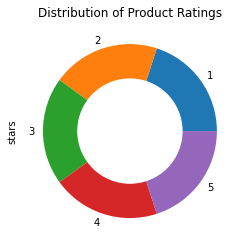

In [53]:
# distribution of each category
ax = df["stars"].value_counts().plot.pie(title = "Distribution of Product Ratings")
ax = plt.gcf()
ax.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.show()

## 4.2 Number of Reviews per sentiment

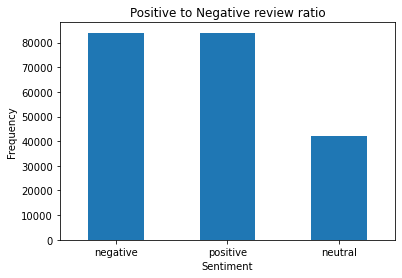

In [54]:
# generate a bar chart for sentiment
ax = df['sentiment'].value_counts().plot.bar()

# set the axes sentiment and the title
ax.set_xlabel('Sentiment')
ax.set_ylabel('Frequency')
ax.set_title('Positive to Negative review ratio')
ax.tick_params(axis='x', rotation=0)

## 4.3 Counting the Vocabulary

In [55]:
join_text = ' '.join(df['merged_text'])

# number of tokens
print('Tokens number:', len(join_text))

# number of word types (unique)
sorted(set(join_text.split()))
print('Unique word types number:', len(set(join_text.split())))

Tokens number: 25441490
Unique word types number: 44856


> This dataset has a vocabulary of around 44851 unique word

In [56]:
# measure of lexical diversity, some text with high diversity while other with low
# word types / word tokens
lexical_diversity = len(join_text)/len(set(join_text.split()))
print('Lexical diversity:', round(lexical_diversity, 2))

Lexical diversity: 567.18


## 4.4 Word Count and Character Count

In [57]:
# add the word and character length as new features
# count for word 
df['word_length'] = df['merged_text'].apply(lambda x: len(x.split()))

# count for character
df['character_length'] = df['merged_text'].apply(lambda x: len(x))
df.head(2)

review_id          reviewer_id  stars  \
id                                           
0   en_0964290  reviewer_en_0342986      1   
1   en_0690095  reviewer_en_0133349      1   

                                          review_body  \
id                                                      
0   Arrived broken. Manufacturer defect. Two of th...   
1   the cabinet dot were all detached from backing...   

                                         review_title  product_category  \
id                                                                        
0   I'll spend twice the amount of time boxing up ...         furniture   
1                                        Not use able  home_improvement   

   sentiment                                        merged_text  word_length  \
id                                                                             
0   negative  arrive break manufacturer defect two legs base...           71   
1   negative              cabinet dot detach back get not able             7   

    character_length  
id                    
0                449  
1                 37

In [58]:
df.describe().round(2)

stars  word_length  character_length
count  210000.00    210000.00         210000.00
mean        3.00        19.58            120.15
std         1.41        16.63            104.86
min         1.00         0.00              0.00
25%         2.00         9.00             53.00
50%         3.00        15.00             91.00
75%         4.00        25.00            151.00
max         5.00       353.00           2285.00

### 4.4.1 Word and Character Frequency

In [59]:
# the word length frequency of each word
word_length_count = df['word_length'].value_counts().head(10).sort_values(ascending = False)
word_length_count.rename_axis('word length').to_frame('count')

count
word length       
6            11100
8            11008
7            10903
9             9994
10            9826
11            9046
5             8940
12            8706
13            7989
14            7706

In [60]:
# the character length frequency of each word
character_length_count = df['character_length'].value_counts().head(10).sort_values(ascending = False)
character_length_count.rename_axis('character length').to_frame('count')

count
character length       
44                 1854
40                 1846
38                 1828
46                 1798
42                 1792
34                 1781
43                 1765
39                 1759
41                 1749
45                 1742

### 4.4.2 Word Length Frequency

In [61]:
# frequency distribuation of each word along with its length
len_fdist = FreqDist()
joint = ' '.join(df['merged_text']).split()
for word in joint:
    len_fdist[len(word)] += 1

len_fdist

FreqDist({4: 1179857, 5: 737987, 3: 702686, 6: 526488, 7: 399481, 8: 184328, 9: 132691, 10: 92333, 2: 69988, 11: 41716, ...})

In [62]:
# length of the words reviews
len_fdist.keys()

dict_keys([6, 5, 12, 3, 4, 10, 2, 8, 7, 9, 11, 13, 1, 17, 14, 18, 15, 21, 22, 16, 20, 19, 23, 26, 24, 30, 35, 25, 27, 39, 28, 36, 31, 29, 33])

In [63]:
# shows the length of words that occur once
print(len_fdist.hapaxes())

[30, 35, 27, 39, 36, 31, 29, 33]


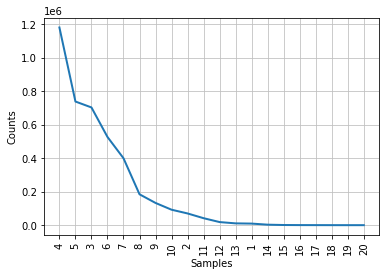

In [64]:
# a power law for distribuation word length based on frequency of occurences
len_fdist.plot(20, cumulative = False);

### 4.4.3 Word Length per Sentiment

In [65]:
# maximum word length and character length for each sentiment
df.groupby(['sentiment'], sort=False)['word_length'].max().to_frame('max')

max
sentiment     
negative   325
neutral    346
positive   353

### 4.4.4 Character Length per Sentiment

In [66]:
df.groupby(['sentiment'], sort=False)['character_length'].max().to_frame('max')

max
sentiment      
negative   2129
neutral    2285
positive   2147

### 4.4.5 Average of Word and Character Count Before and After Pre-processing

In [67]:
# compare the average of word count and character count for both pre-processing and after processing
pre_text = df['review_body'] + df['review_title']

# Word count
merged_text_wc = round(df['merged_text'].apply(lambda x: len(x.split())).mean(), 2)
pre_text_wc = round(pre_text.apply(lambda x: len(x.split())).mean(), 2)

# character count
merged_text_cc = round(df['merged_text'].apply(lambda x: len(x)).mean(), 2)
pre_text_cc = round(pre_text.apply(lambda x: len(x)).mean(), 2)

# match_join = pd.concat([merged_text_wc, pre_text_wc, merged_text_cc, pre_text_cc] , axis = 1 , join = "inner").plot.bar()
# match_join

# plt.bar(merged_text_wc, pre_text_wc, merged_text_cc, pre_text_cc)
print('Word count for pre-processing text:', pre_text_wc,'\nWord count  after processing:', merged_text_wc,'\n')
print('Character count for pre-processing text:', pre_text_cc, '\nCharacter count  after processing:', merged_text_cc)

Word count for pre-processing text: 37.65 
Word count  after processing: 19.58 

Character count for pre-processing text: 203.07 
Character count  after processing: 120.15


> As a result of the text pre-processing the average number of words in one review reduced by almost 50% from 38 to 20 words and  average characters from 203 to only 120.

## 4.5 Number Of Reviews per Category

Number of product's category: 31 



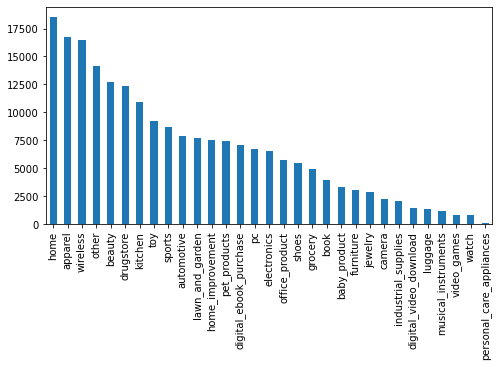

In [68]:
# number of the unique categories 
print("Number of product's category:", len(df['product_category'].unique()), '\n')

# generate a bar chart to explore the product category
df.product_category.value_counts().plot.bar(figsize=(8, 4));

> The majority of the products has the same rate with average of 3 which indicates that they have positive review, except for the the digital E-book purchase has just over 3.5 rate

## 4.6 Breakdown of sentiments per product category

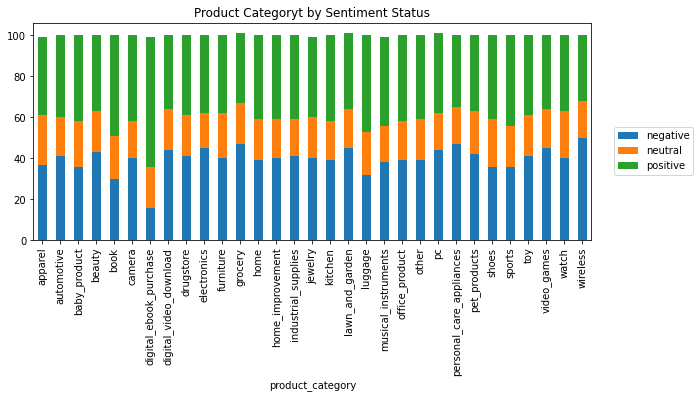

In [69]:
pd.crosstab(df.product_category, df.sentiment).apply(lambda x: round(x*100/x.sum()), axis=1).plot.bar(
    figsize=(10, 4), stacked=True, title = 'Product Categoryt by Sentiment Status').legend(loc = (1.04, 0.30))

> The majority of the products has the same sentiment, except for the the digital E-book purchase has a high positive review than negative. The neutral looks significantly small, but that is because the rating from 1-5 and neutral has only 3 for rating

## 4.7 Interactive Sentiment Movement

> Analyzing around 7,000 reviewers who has reviewed more than 1 product to understand whether there is a change in their sentiment over time.
>
> The methodolody is based on comparing sentiment of the last 2 reviews of the same customer (reviwer_id) and observing the change. For example customer was not happy and gave a negative review then the customer had a better experneince and accordingly gave a positive review, the code was inspired from <cite id="xpiyh"><a href="#zotero|11835528/PLNQSCAY">(plotlygraphs 2019)</a></cite>

In [71]:
# aggregate to get a summary of movement frequency
reviewer_duplicate = df[df.duplicated(['reviewer_id'], keep = False)]
print("Number of duplicated items:", len(reviewer_duplicate), '\n \n')

# idnetifying reviewer with more than 1 review
df_duplicate = reviewer_duplicate[['review_id', 'reviewer_id', 'sentiment']].sort_values(['reviewer_id', 'review_id'], ascending = False)
df_duplicate['reviewer_index'] = df_duplicate.groupby('reviewer_id').cumcount() + 1
# df_duplicate.query('reviewer_index == 1 & sentiment == "negative"').iloc[:,2:]

# tag the last review and the one before for the same reviewer_id
l_df = df_duplicate[df_duplicate["reviewer_index"] == 1].iloc[:,1:]
r_df = df_duplicate[df_duplicate["reviewer_index"] == 2].iloc[:,1:]
merge_df = l_df.merge(r_df, on='reviewer_id', how='left')
merge_df = merge_df[['sentiment_x', 'sentiment_y']]

# summary of movement frequency
merge_df = merge_df.groupby(['sentiment_x', 'sentiment_y']).size().to_frame(name = 'count').reset_index()

Number of duplicated items: 6995 
 



Developed a sankey chart to showcase the movement, this chart is well suited when illustarting a movement between 2 snapshots of time 

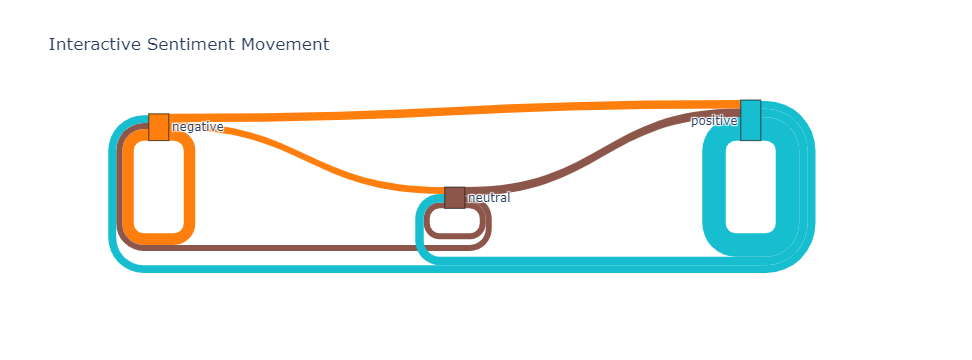

In [72]:
# source is the review before last, while target is the sentiment of the next review for the same reviewer id 
# count is basically how many customers (out of the 7000) have that movement. for example sentiment was positive but then in the next review it became negative
all_nodes = merge_df["sentiment_x"].values.tolist() + merge_df["sentiment_y"].values.tolist()
source_indices = [all_nodes.index(i) for i in merge_df["sentiment_x"]]
target_indices = [all_nodes.index(i) for i in merge_df["sentiment_y"]]

colors = pex.colors.qualitative.D3

node_colors_mappings = dict([(node,np.random.choice(colors)) for node in all_nodes])
node_colors = [node_colors_mappings[node] for node in all_nodes]
edge_colors = [node_colors_mappings[node] for node in all_nodes]

fig = go.Figure(data = [go.Sankey( node = dict(pad = 10, thickness = 20, line = dict(color = "black", width = 0.5), label =  all_nodes, color =  node_colors),
                                  link = dict(source = source_indices, target = target_indices, 
                                              value = merge_df["count"], color = edge_colors,))])

fig.update_layout(title_text = "Interactive Sentiment Movement")
fig.show()

It is observed that majoiry of the customers had 2 consecutive positive reviews (913 out of 7,000) followed by customers who had 2 consecutive negative reviews (450 out of 7,000)

# 5. N-gram Analysis

> Analysing the highly co-located word(s) in reviews based on sentiments for each of unigram, bigram, senetnces and using collocations

## 5.1 Unigram

In this step, a list of the 30 most frequently occurring words in the reviews and per sentiment class. In the scenario when individual words are only analyzed. These words are called unigrams.

The outcome from each sentiment class is then joined together so only words which are frequenct in all of the classes remain.In order to understand the distribution better a bar plot of these unigrams is visualized.

all reviews  positive  neutral  negative
common words                                          
great               47644     34069     6801      6774
product             34357     13316     5313     15728
quality             22648     10029     4058      8561
really              19652      8981     4519      6152
order               17698      4722     3275      9701
small               15581      4979     4286      6316
purchase            12951      5021     1937      5993
light               12478      5627     2522      4329
color               12281      5266     2983      4032
first               11969      3311     2320      6338
better              11582      4409     3086      4087
expect              10663      4208     3010      3445
phone               10599      3701     2046      4852

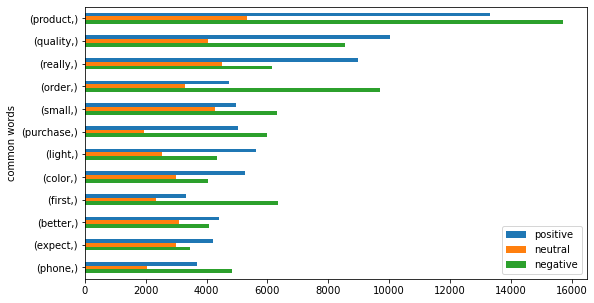

In [73]:
# split the dataframe into positive, negative and neutral to eas
df_positive = df.loc[(df["sentiment"] == "positive")]
df_negative = df.loc[(df["sentiment"] == "negative")]
df_neutral = df.loc[(df["sentiment"] == "neutral")]

# set the unigram word for all the reviews
joint = ' '.join(df['merged_text']).split()
common_all = pd.DataFrame([(word) for word in joint if len(word) > 4]).value_counts()[:30]

# set the unigram word for positive sentiment
joint = ' '.join(df_positive['merged_text']).split()
common_pos = pd.DataFrame([(word) for word in joint if len(word) > 4]).value_counts()[:30]

# set the unigram word for neutral sentiment
joint = ' '.join(df_neutral['merged_text']).split()
common_neu = pd.DataFrame([(word) for word in joint if len(word) > 4]).value_counts()[:30]

# set the unigram word for negative sentiment
joint = ' '.join(df_negative['merged_text']).split()
common_neg = pd.DataFrame([(word) for word in joint if len(word) > 4]).value_counts()[:30]

# concat all the above dataframes using "inner" to get the shared common words between all of them
common_merge = pd.concat([common_all, common_pos, common_neu, common_neg], axis = 1, join = "inner")
# rename the columns
common_merge = common_merge.rename(columns = { 0 :'all reviews', 1 : 'positive', 2 : 'neutral', 3 : 'negative'}).rename_axis('common words')
display(common_merge)

# all the reviews common word are removed to have a better shape
common_merge.iloc[1:,1:].plot.barh(figsize = (9, 5)).invert_yaxis()

### 5.1.1 Plot Top 20 Words Frequency for all the Reviews

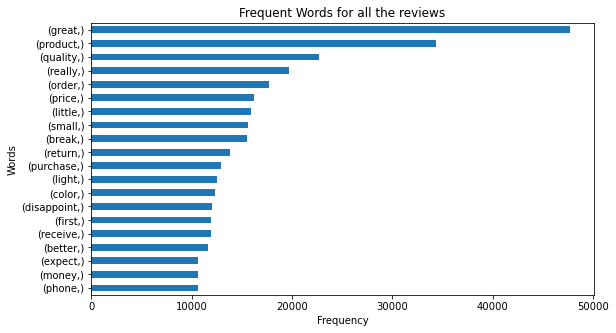

In [74]:
ax = common_all[:20].plot.barh(title = 'Frequent Words for all the reviews', legend = False, figsize = (9, 5))
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
# invert the y-axis to set the highest category to be at the top of the plot
ax.invert_yaxis();

### 5.1.2 Plot Top 20 Words Frequency for the Positive Reviews

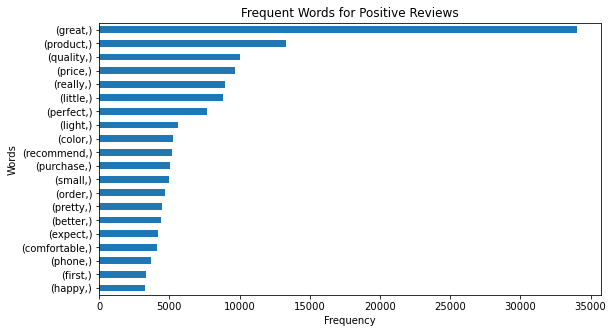

In [75]:
ax = common_pos[:20].plot.barh(title = 'Frequent Words for Positive Reviews', legend = False, figsize = (9, 5))
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
# invert the y-axis to set the highest category to be at the top of the plot
ax.invert_yaxis();

### 5.1.3 Plot Top 20 Words Frequency for the Neutral Reviews

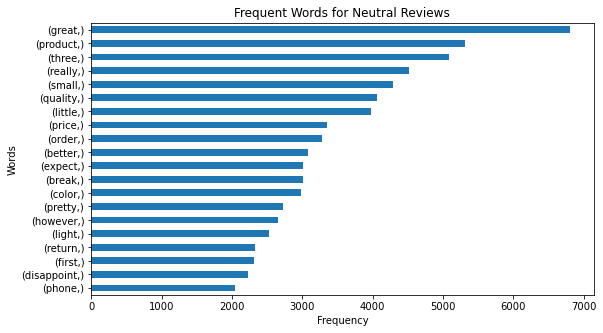

In [76]:
ax = common_neu[:20].plot.barh(title = 'Frequent Words for Neutral Reviews', legend = False, figsize = (9, 5))
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
# invert the y-axis to set the highest category to be at the top of the plot
ax.invert_yaxis();

### 5.1.4 Plot Top 20 Words Frequency for the Negative Reviews

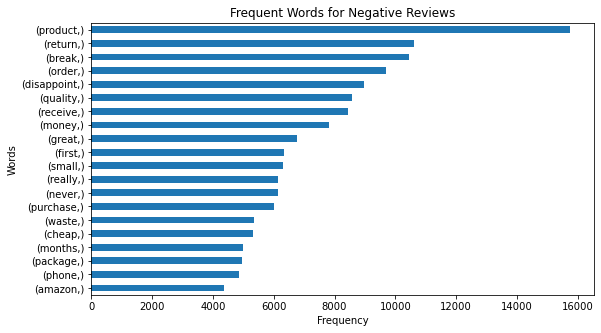

In [77]:
ax = common_neg[:20].plot.barh(title = 'Frequent Words for Negative Reviews', legend = False, figsize = (9, 5))
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
# invert the y-axis to set the highest category to be at the top of the plot
ax.invert_yaxis();

## 5.2 Bigram Analysis

> Generating bigram analysis for each sentiment class gives a good understanding and showcase the variances among them, the below code inspired by <cite id="jbrgq"><a href="#zotero|11835528/7S2TIR9T">(Perkins 2014)</a></cite>

In [78]:
joint_all = ' '.join(df['merged_text']).split()
bigram_all = (pd.Series(nltk.ngrams(joint_all, 2)).value_counts())[:10]

joint_pos = ' '.join(df_positive['merged_text']).split()
bigram_pos = (pd.Series(nltk.ngrams(joint_pos, 2)).value_counts())[:10]

joint_neu = ' '.join(df_neutral['merged_text']).split()
bigram_neu = (pd.Series(nltk.ngrams(joint_neu, 2)).value_counts())[:10]

joint_neg = ' '.join(df_negative['merged_text']).split()
bigram_neg = (pd.Series(nltk.ngrams(joint_neg, 2)).value_counts())[:10]

Bigram for all the reviews:


counts
all bigram words        
(not, work)        10800
(can, not)          9938
(not, buy)          6465
(work, great)       6342
(work, well)        5793
(three, star)       4633
(not, fit)          4507
(five, star)        4467
(four, star)        4368
(two, star)         4308

<------------------------------------------------->

 Bigram for positive sentiment:


counts
positive bigram words        
(work, great)            4456
(four, star)             4338
(five, star)             4309
(work, well)             3328
(great, product)         3008
(can, not)               2905
(good, quality)          2806
(good, product)          1812
(well, make)             1599
(great, price)           1582

<------------------------------------------------->

 Bigram for neutral sentiment:


counts
neutral bigram words        
(three, star)           4586
(can, not)              1982
(not, work)             1709
(work, well)            1178
(not, fit)              1118
(not, good)             1096
(not, sure)             1036
(not, great)             886
(not, really)            841
(work, great)            839

<------------------------------------------------->

 Bigram for negative sentiment:


counts
negative bigram words        
(not, work)              8353
(not, buy)               5543
(can, not)               5051
(two, star)              4245
(one, star)              3891
(waste, money)           3811
(not, even)              3094
(not, recommend)         3024
(not, fit)               2859
(not, worth)             2703

<AxesSubplot:xlabel='negative bigram words'>

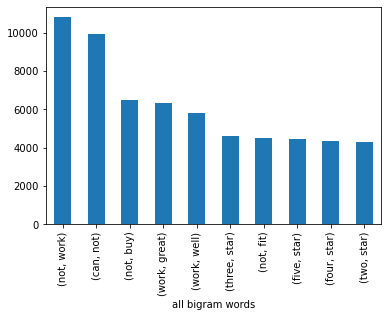

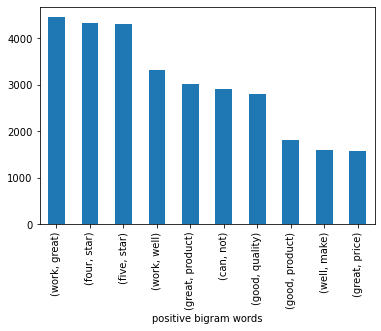

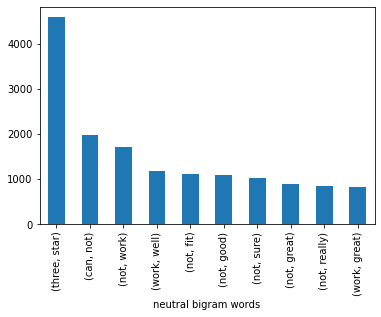

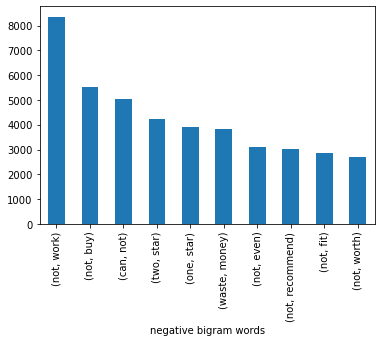

In [79]:
bigram_merge = pd.concat([bigram_all, bigram_pos, bigram_neu, bigram_neg])
bigram_merge = common_merge.rename(columns = { 0 :'all reviews', 1 : 'positive', 2 : 'neutral', 3 : 'negative'}).rename_axis('bigram words')
bigram_merge

print('Bigram for all the reviews:')
display(bigram_all.rename_axis('all bigram words').to_frame('counts'))
bigram_all.rename_axis('all bigram words').to_frame('counts').plot.bar(legend = False)
print('<------------------------------------------------->')
print('\n', 'Bigram for positive sentiment:')
display(bigram_pos.rename_axis('positive bigram words').to_frame('counts'))
bigram_pos.rename_axis('positive bigram words').to_frame('counts').plot.bar(legend = False)
print('<------------------------------------------------->')
print('\n', 'Bigram for neutral sentiment:')
display(bigram_neu.rename_axis('neutral bigram words').to_frame('counts'))
bigram_neu.rename_axis('neutral bigram words').to_frame('counts').plot.bar(legend = False)
print('<------------------------------------------------->')
print('\n', 'Bigram for negative sentiment:')
display(bigram_neg.rename_axis('negative bigram words').to_frame('counts'))
bigram_neg.rename_axis('negative bigram words').to_frame('counts').plot.bar(legend = False)

## 5.3 Collocations

> Collocation was performed to get better accuracy than the bigram, as bigram doesn't look for the context of the two words meaning while collocation takes it into account, the code was inspired from <cite id="fz3tg"><a href="#zotero|11835528/N5XT8D3F">(Gupta 2020)</a></cite>.

### 5.3.1 Top 10 Collocation Words Frequency for All the Reviews

In [80]:
# call bigram collocation finder
bigram_collocation = BigramCollocationFinder.from_words(' '.join(df['merged_text']).split())

# return bigram that doesn't contain star word (meaningless)
bigram_collocation.apply_ngram_filter(lambda *w: 'star' in w)

# get the highest 10 bigram
collocation_all = []
for i in bigram_collocation.score_ngrams(BigramAssocMeasures().likelihood_ratio)[:10]:
    collocation_all.append(i)

pd.DataFrame(collocation_all, columns = ['all collocation', 'counts']).round(2)

all collocation    counts
0           (can, not)  57968.48
1       (waste, money)  41604.64
2  (customer, service)  28339.56
3         (work, well)  25151.20
4        (work, great)  19531.87
5          (year, old)  18663.65
6  (screen, protector)  18184.89
7  (highly, recommend)  18130.25
8          (not, work)  16973.97
9      (good, quality)  16113.72

### 5.3.2 Top 10 Collocation Words Frequency for the Positive Reviews

In [81]:
# call bigram collocation finder
bigram_collocation = BigramCollocationFinder.from_words(' '.join(df_positive['merged_text']).split())

# return bigram that doesn't contain star word (meaningless)
bigram_collocation.apply_ngram_filter(lambda *w: 'star' in w)

# get the highest 10 bigram
collocation_positive = []
for i in bigram_collocation.score_ngrams(BigramAssocMeasures().likelihood_ratio)[:10]:
    collocation_positive.append(i)

pd.DataFrame(collocation_positive, columns = ['positive collocation', 'counts']).round(2)

positive collocation    counts
0           (can, not)  20619.62
1  (highly, recommend)  17358.08
2         (work, well)  14674.56
3        (work, great)  13635.34
4      (good, quality)  11788.48
5      (easy, install)  10777.82
6          (year, old)  10461.56
7  (customer, service)  10307.20
8     (great, product)   9455.32
9         (well, make)   7964.19

### 5.3.3 Top 10 Collocation Words Frequency for the Neutral Reviews

In [82]:
# call bigram collocation finder
bigram_collocation = BigramCollocationFinder.from_words(' '.join(df_neutral['merged_text']).split())

# return bigram that doesn't contain star word (meaningless)
bigram_collocation.apply_ngram_filter(lambda *w: 'star' in w)

# get the highest 10 bigram
collocation_neutral = []
for i in bigram_collocation.score_ngrams(BigramAssocMeasures().likelihood_ratio)[:10]:
    collocation_neutral.append(i)

pd.DataFrame(collocation_neutral, columns = ['neutral collocation', 'counts']).round(2)

neutral collocation    counts
0           (can, not)  10978.88
1         (work, well)   5387.24
2  (customer, service)   5060.71
3  (screen, protector)   3725.53
4          (not, sure)   3665.43
5          (year, old)   3495.00
6         (last, long)   3477.66
7           (not, not)   3400.52
8      (cheaply, make)   2983.60
9         (work, fine)   2898.73

### 5.3.4 Top 10 Collocation Words Frequency for the Negative Reviews

In [83]:
# call bigram collocation finder
bigram_collocation = BigramCollocationFinder.from_words(' '.join(df_negative['merged_text']).split())

# return bigram that doesn't contain star word (meaningless)
bigram_collocation.apply_ngram_filter(lambda *w: 'star' in w)

# get the highest 10 bigram
collocation_negative = []
for i in bigram_collocation.score_ngrams(BigramAssocMeasures().likelihood_ratio)[:10]:
    collocation_negative.append(i)

pd.DataFrame(collocation_negative, columns = ['negative collocation', 'counts']).round(2)

negative collocation    counts
0       (waste, money)  36827.83
1           (can, not)  26400.44
2          (not, work)  18961.19
3      (poor, quality)  15309.86
4         (stop, work)  14669.32
5  (customer, service)  12987.30
6     (not, recommend)  12742.11
7         (not, worth)  11969.74
8           (not, buy)  11365.45
9      (cheaply, make)  11003.70

## 5.4 Sentence Frequency

In [84]:
# get the sentence frequency using nltk FreqDist function 
freq_reviews1 = nltk.FreqDist(df['merged_text'])
freq_reviews1 = pd.DataFrame(freq_reviews1.items(), columns=['word', 'frequency_distribution']).sort_values(by = "frequency_distribution", ascending = False)
freq_reviews1.reset_index(drop = True, inplace=True) # reset the index to strat from 0 and onward
freq_reviews1 = freq_reviews1.loc[(freq_reviews1['frequency_distribution'] >= 2)]
freq_reviews1

word  frequency_distribution
0              never receive item one star                       21
1                smaller expect three star                       20
2           never receive product one star                       15
3                        not work not work                       14
4    never receive item never receive item                       14
..                                      ...                     ...
382      work great easy install five star                        2
383             nice comfortable five star                        2
384      item describe fast ship five star                        2
385                       not work not buy                        2
386                       dog not two star                        2

[387 rows x 2 columns]

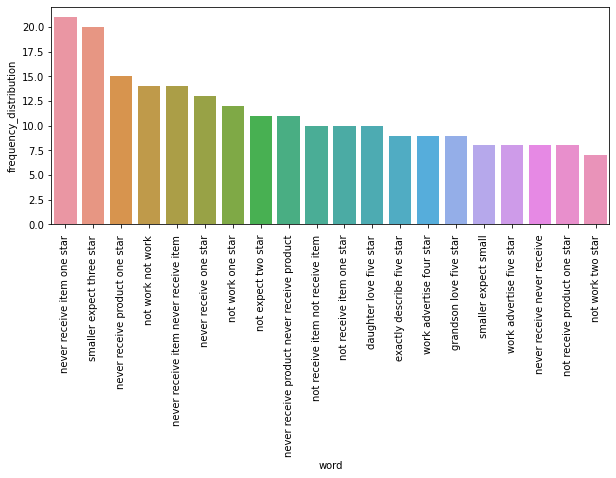

In [85]:
plt.figure(figsize = (10,4))
plot = sns.barplot(x  = freq_reviews1.iloc[:20].word, y = freq_reviews1.iloc[:20].frequency_distribution)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()


## 5.5 Word Cloud

### 5.5.1 Word Cloud for all the reviews

length of all words in the reviews = 25441490 



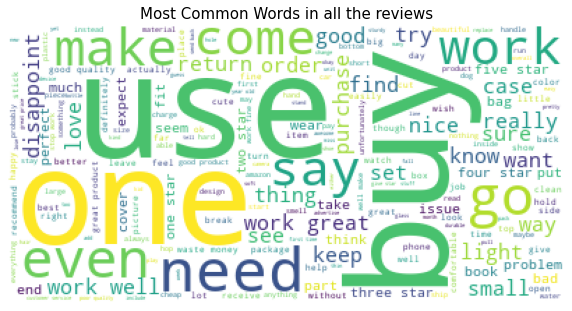

In [86]:
all_sentiment = " ".join(df['merged_text'])
print('length of all words in the reviews =', len(all_sentiment), '\n')

plt.figure(figsize=(10,10))
plt.imshow(WordCloud(background_color = 'white').generate(all_sentiment))
plt.title("Most Common Words in all the reviews", fontsize = 15)
plt.axis('off')
plt.show()

### 5.5.2 Word Cloud for Positive reviews

length of all words in the reviews = 9766420 



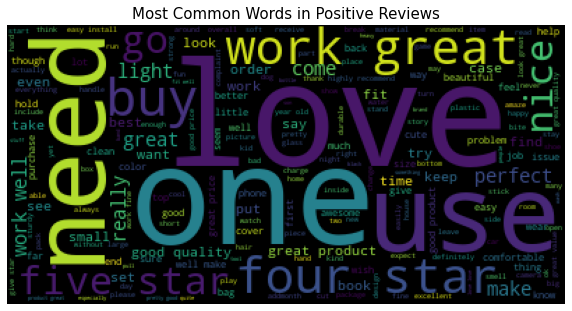

In [87]:
positive_sentiment = " ".join(df_positive['merged_text'])
print('length of all words in the reviews =', len(positive_sentiment), '\n')

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(positive_sentiment))
plt.title("Most Common Words in Positive Reviews", fontsize = 15)
plt.axis('off')
plt.show()

### 5.5.3 Word Cloud for Neutral reviews

length of all words in the reviews = 5271797 



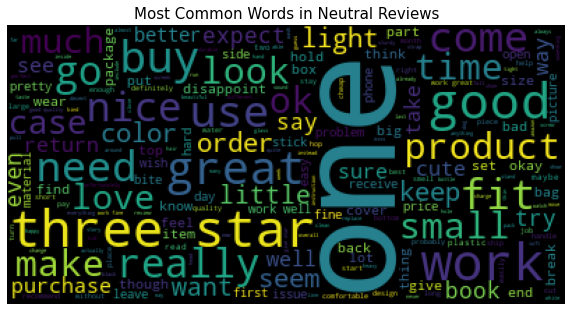

In [88]:
neutral_sentiment = " ".join(df_neutral['merged_text'])
print('length of all words in the reviews =', len(neutral_sentiment), '\n')

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(neutral_sentiment))
plt.title("Most Common Words in Neutral Reviews", fontsize = 15)
plt.axis('off')
plt.show()

### 5.5.4 Word Cloud for Negative reviews

length of all words in the reviews = 10403271 



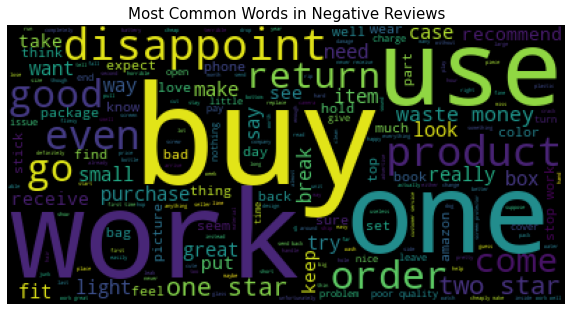

In [89]:
negative_sentiment = " ".join(df_negative['merged_text'])
print('length of all words in the reviews =', len(negative_sentiment), '\n')

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(negative_sentiment))
plt.title("Most Common Words in Negative Reviews", fontsize = 15)
plt.axis('off')
plt.show()

# 6. Top 10 Frequently Distribution by Category

In [90]:
# join all the reviews for the same category in a dataframe
text_categ = df.groupby(['product_category'])['merged_text'].apply(' '.join).reset_index()
text_categ = text_categ.set_index('product_category')
text_categ

merged_text
product_category                                                           
apparel                   terribly do band across top suppose keep shirt...
automotive                unless jampack full items unit collapse never ...
baby_product              tide uncomfortable unhappy  make cheap materia...
beauty                    product faulty seller offer refund ask take do...
book                      order book february never arrive failure send ...
camera                    not work less month contact connection cheap n...
digital_ebook_purchase    tom clancy company uselessly descriptive write...
digital_video_download    mozart not dispute life rare supremacy unfortu...
drugstore                 totally uncomfortable one star  product cause ...
electronics               start off work well eventually microphone stop...
furniture                 arrive break manufacturer defect two legs base...
grocery                   roll come box mark grape jelly mail stay box d...
home                      receive first order product break order second...
home_improvement          cabinet dot detach back get not able  junk not...
industrial_supplies       poor quality material fuzzy day one get discol...
jewelry                   order two different type jewelry company jewel...
kitchen                   follow directions not work advertise waste mon...
lawn_and_garden           follow instructions never catch mosquito one s...
luggage                   arrive spell terrible not want put clothe put ...
musical_instruments       buy two light seem work test mean turn respond...
office_product            pack horrible pack bag time receive crush hope...
other                     easy yes not hardly give color color spotty ta...
pc                        go one day not fit correct not bubble better w...
personal_care_appliances  save money first time try not work several fam...
pet_products              not bother buy toy not even last day cheap  ma...
shoes                     less month wear kiddo wear tread down ton sole...
sports                    barbell pad fine ankle strap terrible not hold...
toy                       not piece one sheet poor advertise  cute defin...
video_games               charge work dream week difficulty charge not c...
watch                     beautiful way not stay pair connect daughters ...
wireless                  product piece shit not buy not work try call c...

In [91]:
# conver the text into a vector with rows are equal to the category size
count_vec = CountVectorizer(max_features = 1000)
x_category = count_vec.fit_transform(text_categ['merged_text']).toarray()
print(x_category.shape)

# convert the vector to a dataframe
matrix = pd.DataFrame(x_category, columns = count_vec.get_feature_names_out())
matrix.index = text_categ.index

matrix = matrix.transpose()
matrix

(31, 1000)


product_category  apparel  automotive  baby_product  beauty  book  camera  \
able                  215         157           119     197    71      94   
absolutely            198          40            44     158    47      19   
accurate               77          35            13      23    17       2   
across                 60          21            18      29    15       6   
actual                 75          37            20      73    51      12   
...                   ...         ...           ...     ...   ...     ...   
yellow                 70          51             5      46    12       4   
yes                    63          38             9      50    14      11   
yet                   167         130            60     228    70      43   
zero                   41          34             6      50    10      10   
zipper                354          12            60      36     1      14   

product_category  digital_ebook_purchase  digital_video_download  drugstore  \
able                                 112                      21        211   
absolutely                            97                      22        119   
accurate                              24                       4        136   
across                                36                       9         29   
actual                                46                      17         59   
...                                  ...                     ...        ...   
yellow                                 2                       0         27   
yes                                   64                      10         56   
yet                                  145                      17        237   
zero                                  10                      11         44   
zipper                                 0                       1         26   

product_category  electronics  ...  other   pc  personal_care_appliances  \
able                      172  ...    332  182                         3   
absolutely                 54  ...    118   68                         1   
accurate                   20  ...     76   19                         0   
across                     21  ...     35   22                         0   
actual                     35  ...     75   43                         0   
...                       ...  ...    ...  ...                       ...   
yellow                      4  ...     35   15                         0   
yes                        32  ...     75   33                         0   
yet                        92  ...    250   93                         2   
zero                       30  ...     55   29                         0   
zipper                     27  ...    188   85                         0   

product_category  pet_products  shoes  sports  toy  video_games  watch  \
able                       206     75     172  186           18     14   
absolutely                 102     62      68  130            6      9   
accurate                    28     19     121   24            1     17   
across                      22     29      24   12            1      3   
actual                      31     25      38   62           14      5   
...                        ...    ...     ...  ...          ...    ...   
yellow                      32     22      28   46            2      3   
yes                         35     12      30   35            1      3   
yet                        108     65     174  127           12     12   
zero                        26     12      62   27            2      2   
zipper                      58    162     119   47            3      0   

product_category  wireless  
able                   370  
absolutely             135  
accurate                56  
across                  48  
actual                 102  
...                    ...  
yellow                  78  
yes                     65  
yet                    239  
zero                    63  
zippe

## 6.1 Top 10 words Mentioned per category

In [92]:
# get the 10 top words for each category
top_words = {}
for i in matrix.columns:
    words = matrix[i].sort_values(ascending = False).head(10)
    top_words[i] = list(zip(words.index, words.values))

top_words

{'apparel': [('not', 12796),
  ('fit', 5992),
  ('size', 5060),
  ('small', 3559),
  ('wear', 3526),
  ('great', 3115),
  ('order', 3062),
  ('good', 2883),
  ('love', 2716),
  ('quality', 2546)],
 'automotive': [('not', 7348),
  ('work', 2746),
  ('fit', 2010),
  ('great', 1794),
  ('good', 1771),
  ('one', 1572),
  ('product', 1529),
  ('buy', 1218),
  ('star', 1067),
  ('light', 1055)],
 'baby_product': [('not', 3479),
  ('great', 818),
  ('baby', 792),
  ('work', 760),
  ('love', 734),
  ('one', 701),
  ('good', 601),
  ('buy', 573),
  ('product', 523),
  ('star', 436)],
 'beauty': [('not', 12895),
  ('product', 4108),
  ('hair', 3360),
  ('work', 3328),
  ('great', 2729),
  ('good', 2655),
  ('use', 2442),
  ('one', 2103),
  ('buy', 1998),
  ('love', 1967)],
 'book': [('book', 3839),
  ('not', 2739),
  ('read', 1125),
  ('great', 920),
  ('good', 863),
  ('love', 752),
  ('star', 615),
  ('page', 582),
  ('one', 521),
  ('buy', 432)],
 'camera': [('not', 2426),
  ('camera', 1046),

## 6.2 Word Cloud of Words Mentioned per category

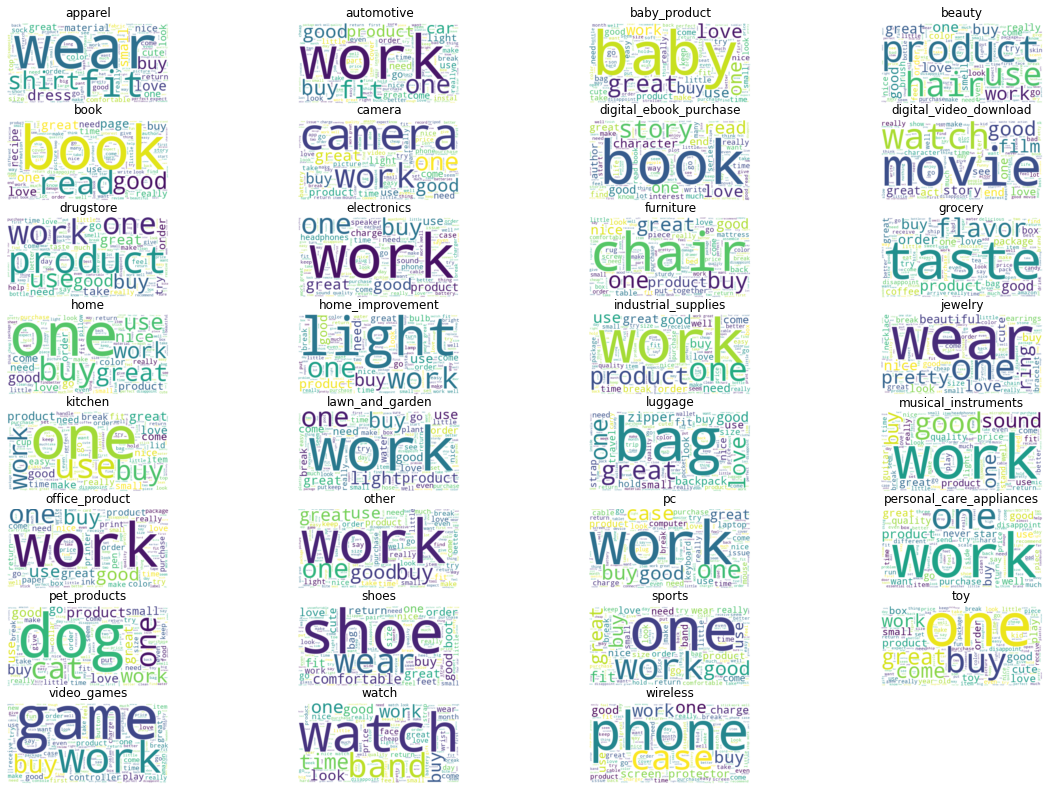

In [93]:
# convert the top words into word cloud per each category
word_cloud = WordCloud(max_font_size = 150, random_state = seed, background_color = 'white')

plt.rcParams['figure.figsize'] = [20, 14]

category_name = ['apparel', 'automotive', 'baby_product', 'beauty', 'book',
                  'camera', 'digital_ebook_purchase', 'digital_video_download',
                  'drugstore', 'electronics', 'furniture', 'grocery', 'home',
                  'home_improvement', 'industrial_supplies', 'jewelry',
                  'kitchen', 'lawn_and_garden', 'luggage',
                  'musical_instruments', 'office_product', 'other', 'pc',
                  'personal_care_appliances', 'pet_products', 'shoes',
                  'sports', 'toy', 'video_games', 'watch', 'wireless']

# Create subplots for each comedian
for index, category in enumerate(matrix.columns):
    word_cloud.generate(text_categ['merged_text'][category])
    
    plt.subplot(8, 4, index + 1)
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(category_name[index])
    
plt.show()

> # Section Three: Modeling

# 1. Label Encooding

> The label encoding was used for the target variable as the target variable is ordered

In [94]:
# encode the target variable with Label encoder
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment']) 

print(df['sentiment_encoded'].value_counts(), '\n')
df.head(3)

0    84000
2    84000
1    42000
Name: sentiment_encoded, dtype: int64 



review_id          reviewer_id  stars  \
id                                           
0   en_0964290  reviewer_en_0342986      1   
1   en_0690095  reviewer_en_0133349      1   
2   en_0311558  reviewer_en_0152034      1   

                                          review_body  \
id                                                      
0   Arrived broken. Manufacturer defect. Two of th...   
1   the cabinet dot were all detached from backing...   
2   I received my first order of this product and ...   

                                         review_title  product_category  \
id                                                                        
0   I'll spend twice the amount of time boxing up ...         furniture   
1                                        Not use able  home_improvement   
2                                The product is junk.              home   

   sentiment                                        merged_text  word_length  \
id                                                                             
0   negative  arrive break manufacturer defect two legs base...           71   
1   negative              cabinet dot detach back get not able             7   
2   negative  receive first order product break order second...           21   

    character_length  sentiment_encoded  
id                                       
0                449                  0  
1                 37                  0  
2                125                  0

# 2. Sampling the DataFrame

> The sampling method was done to downsize the dataset as the model goes unresponsive when executed with the full dataset

In [95]:
sample_df = df.groupby('sentiment_encoded', group_keys=False).apply(lambda x: x.sample(frac = .4, random_state = seed))
print(sample_df['sentiment_encoded'].value_counts(), '\n')
# sample_df.head(3)

0    33600
2    33600
1    16800
Name: sentiment_encoded, dtype: int64 



In [96]:
# set the target variable using label encoding approach
y = sample_df['sentiment_encoded'].values.reshape(-1)

print('Target variable shape:', y.shape)
y

Target variable shape: (84000,)


array([0, 0, 0, ..., 2, 2, 2])

# 3. Feature Extraction

<!-- # Encoding target variable-sentiment -->

> The step before building the sentiment analysis model, Count vectorizer and TFIDF were applied to convert the clean dataset into Bag of Words representation. As the model does not understand text
> 
> Count vectorizer was used in all the models, subsequently, TFIDF was used and the results for both the vectorizers were compared

## 3.1 Count Vectorizer

> Count vectorizer takes a text and convert it into vectors which called Bag of Words, because the model can process only numeric data. Here, only the occurrences of the word will be counted. A max_features is set on the vocabulary to top 1500 most common words to cut down the vocabulary and ensure training is not slow and hence able to be executed within the limit of the machine

In [97]:
## limit the vocabulary size to 1000
vectorizer = CountVectorizer(max_features = 1500)
x_ = vectorizer.fit_transform(sample_df['merged_text']).toarray()
x_.shape

(84000, 1500)

### 3.1.1 Split Dataset into Train/Test Set

> After all the pre-processing, the dataset was divided into train and test set
>
> The train, test and development csv files were merged and then divided as the test and dev percentage were just around 2.5 from the full dataset. Therefore will split them to 80/20 using the train_test_split function in sklearn 

In [98]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_, y, test_size = 0.2, random_state = seed)

In [99]:
print('Train set:', '\n', "Length of x_train :", x_train.shape,'\n' , "Length of y_train :", y_train.shape, '\n')
print('Test set:', '\n', "Length of x_test :" , x_test.shape, '\n', "Length of y_test :", y_test.shape)

Train set: 
 Length of x_train : (67200, 1500) 
 Length of y_train : (67200,) 

Test set: 
 Length of x_test : (16800, 1500) 
 Length of y_test : (16800,)


### 3.1.2 Basesline Model

> When developing models on text analytics or human languages. Very often, at the beginning of the investigation of which ML would provide the best results it is very common to start with a model which is referred to a baseline. Naïve Bayes in this coursework is the choice obtain a baseline result. Mainly due to the usefulness and simplicity of developing a Naïve Bayes classifier as compared to more sophisticated approaches.

In [100]:
gaussian_NB_model = GaussianNB().fit(x_train, y_train)
gaussian_pred = gaussian_NB_model.predict(x_test)

# model accuracy
score_gaussian = accuracy_score(y_test, gaussian_pred)
print('GaussianNB score:', '%.2f'% (score_gaussian*100), '%')

GaussianNB score: 58.40 %


#### 3.1.2.1 Baseline Model Evaluation

In [101]:
print("Classification Report:\n" , classification_report(gaussian_pred, y_test, target_names = ["Negative", "Neutral", "Positive"]))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.54      0.72      0.62      5082
     Neutral       0.29      0.31      0.30      3057
    Positive       0.77      0.60      0.68      8661

    accuracy                           0.58     16800
   macro avg       0.53      0.54      0.53     16800
weighted avg       0.61      0.58      0.59     16800



#### 3.1.2.2 Baseline Confusion Matrix

In [102]:
c_matrix = confusion_matrix(y_test, gaussian_pred)
print(c_matrix)

[[3655 1151 1982]
 [ 847  951 1474]
 [ 580  955 5205]]


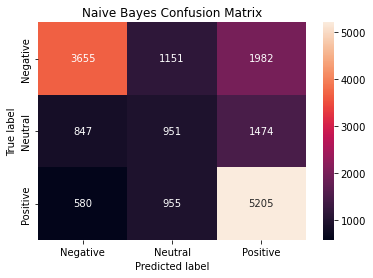

In [103]:
# plotting confusion matrix using seaborn 
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('Naive Bayes Confusion Matrix') # add title
x_axis_labels = ['Negative','Neutral', 'Positive']
y_axis_labels = ['Negative','Neutral', 'Positive']

df_cm = pd.DataFrame(c_matrix)
df_cm.index.name = 'True label' # label y axis
df_cm.columns.name = 'Predicted label' # label x axis


# plot the confusion matrix
sns.heatmap(df_cm, annot = True, ax = ax, fmt = "d", xticklabels = x_axis_labels, yticklabels = y_axis_labels);

### 3.1.5 Classifier Model Function

> Based on the collected dataset, which is a supervised learning approach as each review has a sentiment or label. The following classifiers suited to the dataset

In [104]:
def classifier(model, x_train, x_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    # global y_pred
    global score
    
    
    # Fit the classifier to the training set
    model.fit(x_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(x_test)
    
    # model accuracy
    score = accuracy_score(y_test, y_pred)
    print ('Accuracy score:', '%.2f'% (score*100), '%', '\n\n')
    
    # classification report
    print("Classification Report:\n" , classification_report(y_pred, y_test, target_names = ["Negative", "Neutral", "Positive"]))
    
    # plotting confusion matrix using seaborn 
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_title('Confusion Matrix') # add title
    x_axis_labels = ['Negative','Neutral', 'Positive']
    y_axis_labels = ['Negative','Neutral', 'Positive']

    df_cm = pd.DataFrame(cm)
    df_cm.index.name = 'True label' # label y axis
    df_cm.columns.name = 'Predicted label' # label x axis

    sns.heatmap(df_cm, annot = True, ax = ax, fmt = "d", xticklabels = x_axis_labels, yticklabels = y_axis_labels) # plot the confusio

#### 3.1.5.1 Multinomial Naive Bayes

Accuracy score: 72.17 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.77      0.76      6670
     Neutral       0.43      0.44      0.44      3224
    Positive       0.83      0.81      0.82      6906

    accuracy                           0.72     16800
   macro avg       0.67      0.67      0.67     16800
weighted avg       0.72      0.72      0.72     16800



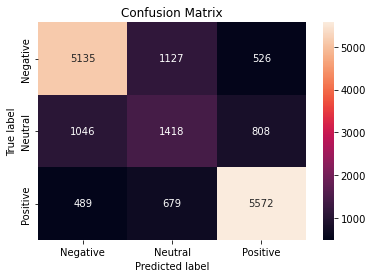

In [105]:
classifier(MultinomialNB(), x_train, x_test)
MultinomialNB_score = round(score*100, 2)

#### 3.1.5.2 Random Forest

Accuracy score: 73.15 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.71      0.78      8241
     Neutral       0.21      0.58      0.30      1161
    Positive       0.85      0.77      0.81      7398

    accuracy                           0.73     16800
   macro avg       0.64      0.69      0.63     16800
weighted avg       0.81      0.73      0.76     16800



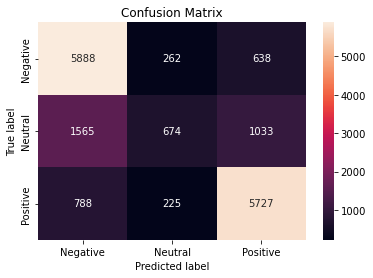

In [106]:
classifier(RandomForestClassifier(random_state = seed), x_train, x_test)
RandomForest_score = round(score*100, 2)

#### 3.1.5.3 Decision Tree

Accuracy score: 64.27 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.70      0.69      0.69      6912
     Neutral       0.34      0.36      0.35      3074
    Positive       0.73      0.73      0.73      6814

    accuracy                           0.64     16800
   macro avg       0.59      0.59      0.59     16800
weighted avg       0.65      0.64      0.64     16800



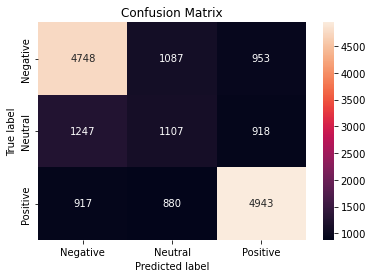

In [107]:
classifier(tree.DecisionTreeClassifier(), x_train, x_test)
DecisionTree_score = round(score*100, 2)

#### 3.1.5.4 Logistic Regression

Accuracy score: 74.78 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.75      0.80      7619
     Neutral       0.31      0.53      0.39      1916
    Positive       0.86      0.80      0.83      7265

    accuracy                           0.75     16800
   macro avg       0.67      0.69      0.67     16800
weighted avg       0.79      0.75      0.76     16800



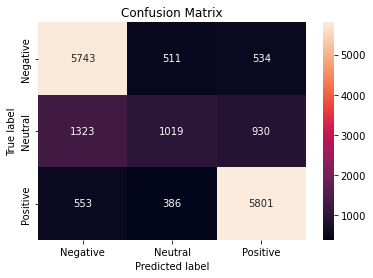

In [108]:
classifier(LogisticRegression(random_state = seed, max_iter=1000), x_train, x_test)
LogisticRegression_score = round(score*100, 2)

#### 3.1.5.5 K-Neighbor

Accuracy score: 67.18 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.64      0.72      8827
     Neutral       0.23      0.44      0.30      1668
    Positive       0.73      0.78      0.75      6305

    accuracy                           0.67     16800
   macro avg       0.59      0.62      0.59     16800
weighted avg       0.73      0.67      0.69     16800



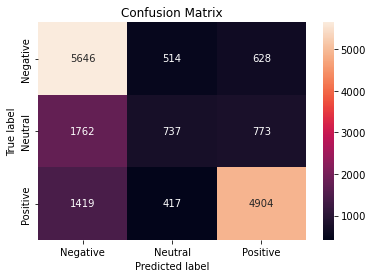

In [109]:
classifier(KNeighborsClassifier(), x_train, x_test)
KNeighbors_score = round(score*100, 2)

#### 3.1.5.6 Bernoulli Naive Bayes

Accuracy score: 70.42 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.77      0.76      6621
     Neutral       0.39      0.44      0.42      2933
    Positive       0.81      0.75      0.78      7246

    accuracy                           0.70     16800
   macro avg       0.65      0.65      0.65     16800
weighted avg       0.71      0.70      0.71     16800



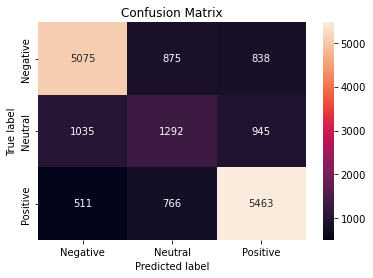

In [110]:
classifier(BernoulliNB(), x_train, x_test)
BernoulliNB_score = round(score*100, 2)

#### 3.1.5.7 Support Vector Machine

In [111]:
# classifier(SVC(kernel = 'linear'), x_train, x_test)
# SVC_score = round(score*100, 2)

## 3.2 TF-IDF

>  TFIDF stands for Term Frequency Inverse Document Frequency. When compared to Count Vectorizer, TFIDF will keep the information regarding the word sequence and order, it also overcome Count Vectorizer issue by dropping unique words

In [112]:
tfidf_vec =  TfidfVectorizer(max_features = 500)
x = tfidf_vec.fit_transform(sample_df['merged_text']).toarray()
x.shape

(84000, 500)

In [113]:
# Checking the vocabulary
# The numbers here are not the count, they are the positions in the sparse vector.
# print(vectorizer.vocabulary_)

In [114]:
print('The length of vocabulary', len(tfidf_vec.get_feature_names_out()))

#Shape returned (5,47) means 5 rows(sentences) and 47 columns(unique words)
print('The x shape is', x.shape)

#In case you are wondering what get_feature_names would return 
tfidf_vec.get_feature_names_out()[:10]

The length of vocabulary 500
The x shape is (84000, 500)


array(['able', 'absolutely', 'actually', 'add', 'advertise', 'ago', 'air',
       'almost', 'already', 'also'], dtype=object)

### 3.2.1 Split Dataset into Train/Test set

> After all the pre-processing, now the dataset will be divided into train and test set

> the train and test csv file will be merged and then divided as th etest percentage is just around 2.5 from the training. Therefore will split them using the train_test_split function in sklearn

In [115]:
# split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)

### 3.2.2 Classifiers

#### 3.2.2.1 Multinomial Naive Bayes

Accuracy score: 71.38 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.70      0.77      8148
     Neutral       0.15      0.69      0.25       724
    Positive       0.85      0.73      0.78      7928

    accuracy                           0.71     16800
   macro avg       0.62      0.71      0.60     16800
weighted avg       0.82      0.71      0.75     16800



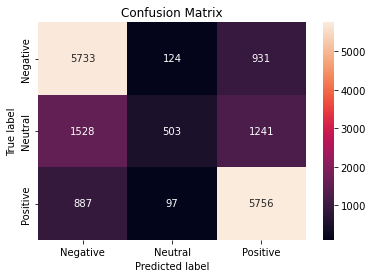

In [116]:
classifier(MultinomialNB(), X_train, X_test)
MultinomialNB_score_tfidf = round(score*100, 2)

#### 3.2.2.2 Random Forest

Accuracy score: 73.01 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.72      0.78      8155
     Neutral       0.21      0.58      0.30      1163
    Positive       0.85      0.77      0.81      7482

    accuracy                           0.73     16800
   macro avg       0.64      0.69      0.63     16800
weighted avg       0.81      0.73      0.76     16800



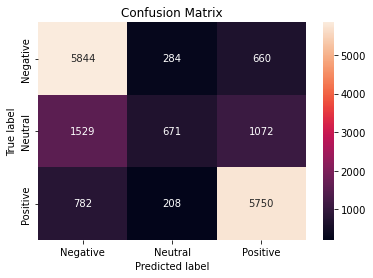

In [117]:
classifier(RandomForestClassifier(random_state = seed), X_train, X_test)
RandomForest_score_tfidf = round(score*100, 2)

#### 3.2.2.3 Decision Tree

Accuracy score: 62.68 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.68      0.68      0.68      6758
     Neutral       0.34      0.34      0.34      3289
    Positive       0.72      0.71      0.72      6753

    accuracy                           0.63     16800
   macro avg       0.58      0.58      0.58     16800
weighted avg       0.63      0.63      0.63     16800



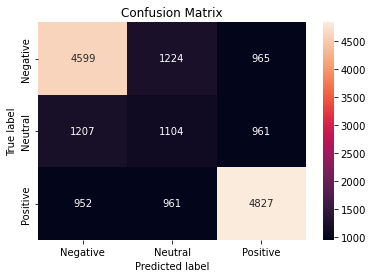

In [118]:
classifier(tree.DecisionTreeClassifier(), X_train, X_test)
DecisionTree_score_tfidf = round(score*100, 2)

#### 3.2.2.4 Logistic Regression

Accuracy score: 73.80 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.74      0.79      7808
     Neutral       0.27      0.54      0.36      1658
    Positive       0.85      0.78      0.82      7334

    accuracy                           0.74     16800
   macro avg       0.66      0.69      0.66     16800
weighted avg       0.79      0.74      0.76     16800



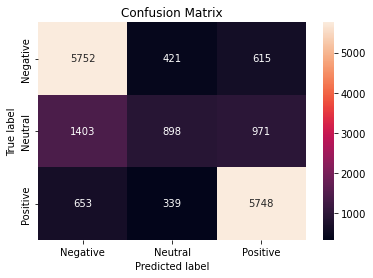

In [119]:
classifier(LogisticRegression(random_state = seed, max_iter=1000), X_train, X_test)
LogisticRegression_score_tfidf = round(score*100, 2)

#### 3.2.2.5 K-Neighbor

Accuracy score: 61.32 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.60      0.68      8649
     Neutral       0.24      0.39      0.30      2029
    Positive       0.64      0.70      0.67      6122

    accuracy                           0.61     16800
   macro avg       0.55      0.56      0.55     16800
weighted avg       0.66      0.61      0.63     16800



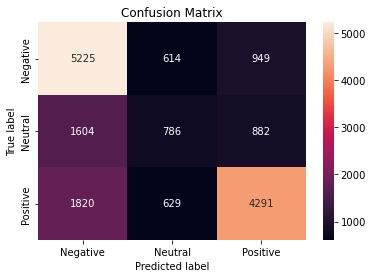

In [120]:
classifier(KNeighborsClassifier(), X_train, X_test)
KNeighbors_score_tfidf = round(score*100, 2)

#### 3.2.2.6 Bernoulli Naive Bayes

Accuracy score: 69.62 % 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.75      0.75      6823
     Neutral       0.35      0.44      0.39      2610
    Positive       0.81      0.74      0.77      7367

    accuracy                           0.70     16800
   macro avg       0.64      0.64      0.64     16800
weighted avg       0.71      0.70      0.70     16800



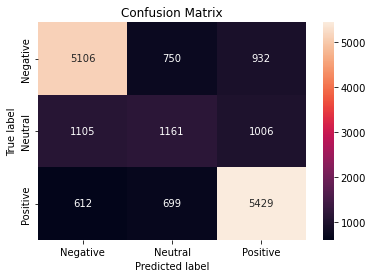

In [121]:
classifier(BernoulliNB(), X_train, X_test)
BernoulliNB_score_tfidf = round(score*100, 2)

#### 3.2.2.7 Support Vector Machine

In [122]:
# classifier(SVC(kernel = 'linear'), x_train, x_test)
# SVC_score = round(score*100, 2)

### 3.2.3 The Best Model

In [126]:
df_summary = pd.DataFrame([[MultinomialNB_score, MultinomialNB_score_tfidf], [RandomForest_score, RandomForest_score_tfidf], [DecisionTree_score, DecisionTree_score_tfidf],
                          [LogisticRegression_score, LogisticRegression_score_tfidf], [KNeighbors_score, KNeighbors_score_tfidf], [BernoulliNB_score, BernoulliNB_score_tfidf]],
             ['Multinomial Naive Bayes', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'K-Neighbor', 'Bernoulli Naive Bayes'],    
             columns=['Count Vectorizer', 'TFIDF Vectorizer']).round(3)
display(df_summary)
        
value = df_summary.max().max()
item = (df_summary == value).idxmax(axis = 0)[0]
vectorizer = (df_summary == value).idxmax(axis = 1)[0]

print('Best value: {} \nModel: {} \nVectorizer: {}'.format(value, item, vectorizer))

Count Vectorizer  TFIDF Vectorizer
Multinomial Naive Bayes             72.17             71.38
Random Forest                       73.15             73.01
Decision Tree                       64.27             62.68
Logistic Regression                 74.78             73.80
K-Neighbor                          67.18             61.32
Bernoulli Naive Bayes               70.42             69.62

Best value: 74.78 
Model: Logistic Regression 
Vectorizer: Count Vectorizer


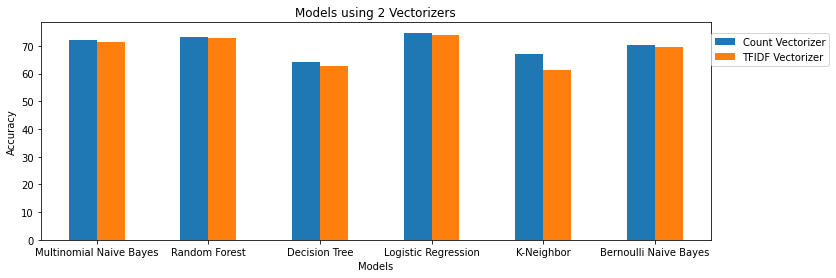

In [124]:
ax = df_summary.plot.bar(figsize = (12,4))

# set the axes labels and the title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Models using 2 Vectorizers')
ax.tick_params(axis = 'x', rotation = 0)
ax.legend(loc = (1.00, 0.80))

plt.show()

> The plot shows a slight advantage for the Count vectorizer over the TFIDF. 

#### 3.2.3.1 Tuning The Best Model

> Applying GridSearchCV for the best model to fine-tune the parameters and then retrain them on a the same model, then getting the accuracy for the final classifer

In [127]:
lr_grid = {"C": [0.01, 0.1, 1, 10,1000], 'solver':['newton-cg', 'lbfgs'], 'penalty': ['l2']}

grid_lr = GridSearchCV(LogisticRegression(multi_class = 'ovr', random_state = seed), lr_grid, cv = 2, verbose = 1, n_jobs = -1)
grid_lr.fit(x_train, y_train)

print("Best parameters set:", grid_lr.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters set: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [128]:
# retrain the model with the new hyperparameters
lr_model = LogisticRegression(multi_class='ovr', C = 0.1, penalty = 'l2', solver = 'newton-cg', 
                              random_state = seed).fit(x_train, y_train)

# Predict the test set
grid_lr_pred = lr_model.predict(x_test)

# model accuracy
grid_lr_score = accuracy_score(y_test, grid_lr_pred)
print ('Tuned Logistic Regression Accuracy:', '%.2f'% (grid_lr_score*100), '%', '\n\n')

Tuned Logistic Regression Accuracy: 74.92 % 




> There is a slight improvement after tuning the hyperparameters for the logistic regression accuracy from 74.78 % to 74.92 %

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.75      0.80      7832
     Neutral       0.26      0.57      0.36      1510
    Positive       0.87      0.79      0.83      7458

    accuracy                           0.75     16800
   macro avg       0.67      0.70      0.66     16800
weighted avg       0.81      0.75      0.77     16800



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

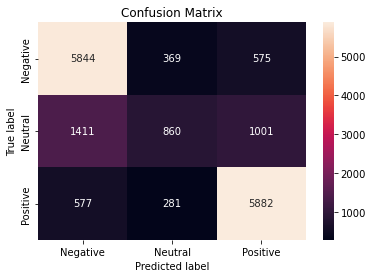

In [129]:
# plot a confusion matrix for the best model with a classification report
print("Classification Report:\n" , classification_report(grid_lr_pred, y_test, target_names = ["Negative", "Neutral", "Positive"]))

# plotting confusion matrix using seaborn 
cm = confusion_matrix(y_test, grid_lr_pred)
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('Confusion Matrix') # add title
x_axis_labels = ['Negative','Neutral', 'Positive']
y_axis_labels = ['Negative','Neutral', 'Positive']

df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label' # label y axis
df_cm.columns.name = 'Predicted label' # label x axis

sns.heatmap(df_cm, annot = True, ax = ax, fmt = "d", xticklabels = x_axis_labels, yticklabels = y_axis_labels) 

> # Section Three: Conclusions

# 1. Evaluation

The baseline model achieved an accuracy of 58.40 % using the simplest model Gaussian Naive Bayes. Then different classifiers where generated. At high-level, the approach was to compare between models with features extracted using Count Vectorizer or TFIDF.

In the case of Count Vectorizer, Logistic Regression had the highest accuracy among all the classifiers with 74.78 % accuracy, followed by Random Forest with 73.15 %. Multinomial Naive Bayes and Bernoulli Naive Bayes reached 72.17 % and 70.42% respectively.

On the other hand, while using TFIDF, Logistic Regression also had the highest accuracy with 73.80 % followed by Random Forest with 73.01 %. Multinomial Naive Bayes and Bernoulli Naive Bayes reached 71.38 % and 69.62 % respectively.
Decision Tree and K-Neighbor achieved the least accuracy. Support Vector Machine wasn’t possible to be tested due to machine limitation, even though it was tested with 20% of the data.

Next step was to perform hyperparameter fine-tuning on the selected model, which is Logistic Regression. Grid Search was used on the model parameters (C : [0.01, 0.1, 1, 10, 1000], solver :[newton-cg, lbfgs] and penalty : l2). by updating the hyperparameters using C: 0.1, penalty: l2, and solver: newton-cg the accuracy improved slightly from 74.78 % to 74.92 % 
The produced confusion matrix also provided more details on the model performance for F1, precision and recall scores.

# 2. Summary and Conclusions

The coursework is addressing a classification problem which is predicting the sentiment of customer reviews on Amazon products. The dataset is sourced from Amazon website and have been checked that it is balanced among all the 5-scale ratings. 
The following steps have been conducted in the ML pipeline (data exploration, pre-processing, model training and evaluation). 
Stopwords have been removed since they don't provide any insight. Beside that, some words have been added after analysing n-gram.

Moreover, negation words (like not, wouldn't) were removed from the stopwords list since if removed the sentiment will be converted from negative to positive sentiment. For example saying, "the watch was not working" here not indicates a negative sentiment.

One point to mention in the pre-processing phase “stemming” was descoped although it preserve memory but, it might impact the model performance negatively and change the words meaning.

For text representation two techniques have been explored Bag of Words and TFIDF. Confusion matrix was used for model evaluation to evaluate the produced models with focus on accuracy metric and Logistic Regressions was identified to be the most accurate model. Highlighting here that SVM model wasn’t possible to be tested due to machine limitation (it did not work even on 20%)
Once the best model was selected, Grid Search was used to fine-tune the Logistic Regressions model for further improve the results. 

Deep learning will be considered as a future work, since it has a big chance to generate a better accuracy.

# 3. References

Dataset: https://registry.opendata.aws/amazon-reviews-ml/
<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
      <div class="csl-entry"><i id="zotero|11835528/9KPR9SYK"></i>AlZu’bi, S., Alsmadi, A., Qatawneh, S., Al-Ayyoub, M., Hawashin, B. &#38; Jararweh, Y., 2019, <i>A Brief Analysis of Amazon Online Reviews</i>.</div>
  <div class="csl-entry"><i id="zotero|11835528/PA9H2U58"></i>Fang, X. &#38; Zhan, J., 2015, ‘Sentiment analysis using product review data’, <i>Journal of Big Data</i>, 2(1), 5.</div>
  <div class="csl-entry"><i id="zotero|11835528/N5XT8D3F"></i>Gupta, S., 2020, <i>Collocations in NLP using NLTK library</i>, <i>Medium</i>.</div>
  <div class="csl-entry"><i id="zotero|11835528/W8I2WS5S"></i>Jurafsky, D. &#38; Martin, J.H., 2014, <i>Speech and Language Processing</i>, Three.</div>
  <div class="csl-entry"><i id="zotero|11835528/XUD9P6U5"></i>Keung, P., Lu, Y., Szarvas, G. &#38; Smith, N.A., 2020, ‘The Multilingual Amazon Reviews Corpus’, <i>arXiv:2010.02573 [cs]</i>.</div>
  <div class="csl-entry"><i id="zotero|11835528/7S2TIR9T"></i>Perkins, J., 2014, <i>Bag of words feature extraction</i>.</div>
  <div class="csl-entry"><i id="zotero|11835528/PLNQSCAY"></i>plotlygraphs, 2019, <i>Sankey Diagram</i>.</div>
  <div class="csl-entry"><i id="zotero|11835528/KAUQGKTZ"></i>Shivaprasad, T.K. &#38; Shetty, J., 2017, ‘Sentiment analysis of product reviews: A review’, <i>2017 International Conference on Inventive Communication and Computational Technologies (ICICCT)</i>.</div>
  <div class="csl-entry"><i id="zotero|11835528/CYDVBSNG"></i>2018, <i>Stemming and Lemmatization in Python</i>, <i>DataCamp Community</i>.</div>
</div>
<!-- BIBLIOGRAPHY END -->